#  NLP on Mobile Games

In [1]:
import os
import re # For Regular Expression 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk # Natural Language Tool Kits
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from string import punctuation
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud

%matplotlib inline 
%config InlineBackend.figure_format = 'retina'

In [3]:
df = pd.read_csv('/Users/rakshitmalhotra/Downloads/ag2.csv')
df = df.drop_duplicates().reset_index()
display(df.head(5))
print(df.info())

index                                                URL         ID  \
0      0   https://apps.apple.com/us/app/sudoku/id284921427  284921427   
1      1  https://apps.apple.com/us/app/reversi/id284926400  284926400   
2      2  https://apps.apple.com/us/app/morocco/id284946595  284946595   
3      3  https://apps.apple.com/us/app/sudoku-free/id28...  285755462   
4      4  https://apps.apple.com/us/app/senet-deluxe/id2...  285831220   

            Name Subtitle                                           Icon URL  \
0         Sudoku      NaN  https://is2-ssl.mzstatic.com/image/thumb/Purpl...   
1        Reversi      NaN  https://is4-ssl.mzstatic.com/image/thumb/Purpl...   
2        Morocco      NaN  https://is5-ssl.mzstatic.com/image/thumb/Purpl...   
3  Sudoku (Free)      NaN  https://is3-ssl.mzstatic.com/image/thumb/Purpl...   
4   Senet Deluxe      NaN  https://is1-ssl.mzstatic.com/image/thumb/Purpl...   

   Average User Rating  User Rating Count  Price In-app Purchases  \
0                  4.0             3553.0   2.99              NaN   
1                  3.5              284.0   1.99              NaN   
2                  3.0             8376.0   0.00              NaN   
3                  3.5           190394.0   0.00              NaN   
4                  3.5               28.0   2.99              NaN   

                                         Description  \
0  Join over 21,000,000 of our fans and download ...   
1  The classic game of Reversi, also known as Oth...   
2  Play the classic strategy game Othello (also k...   
3  Top 100 free app for over a year.\nRated "Best...   
4  "Senet Deluxe - The Ancient Game of Life and A...   

                  Developer Age Rating  \
0  Mighty Mighty Good Games         4+   
1          Kiss The Machine         4+   
2               Bayou Games         4+   
3  Mighty Mighty Good Games         4+   
4           RoGame Software         4+   

                                           Languages        Size  \
0  DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...  15853568.0   
1                                                 EN  12328960.0   
2                                                 EN    674816.0   
3  DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...  21552128.0   
4  DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...  34689024.0   

  Primary Genre                             Genres Original Release Date  \
0         Games            Games, Strategy, Puzzle            11/07/2008   
1         Games             Games, Strategy, Board            11/07/2008   
2         Games             Games, Board, Strategy            11/07/2008   
3         Games            Games, Strategy, Puzzle            23/07/2008   
4         Games  Games, Strategy, Board, Education            18/07/2008   

  Current Version Release Date  
0                   30/05/2017  
1                   17/05/2018  
2                    5/09/2017  
3                   30/05/2017  
4                   22/07/2018

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16847 entries, 0 to 16846
Data columns (total 19 columns):
index                           16847 non-null int64
URL                             16847 non-null object
ID                              16847 non-null int64
Name                            16847 non-null object
Subtitle                        5212 non-null object
Icon URL                        16847 non-null object
Average User Rating             7488 non-null float64
User Rating Count               7488 non-null float64
Price                           16823 non-null float64
In-app Purchases                7615 non-null object
Description                     16847 non-null object
Developer                       16847 non-null object
Age Rating                      16847 non-null object
Languages                       16787 non-null object
Size                            16846 non-null float64
Primary Genre                   16847 non-null object
Genres                       

In [4]:
import re # For Regular Expression 
import nltk # Natural Language Tool Kits
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from string import punctuation
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk import bigrams
from nltk import trigrams

In [5]:
print(df['Description'][9])

Barrels O\u2019 Fun is a simple but challenging solitaire game where you match barrels to clear the board before time runs out.  The faster you are, the higher your score.\n\nFeaturing 3 difficulty levels and complete in-game instructions, Barrels O\u2019 Fun is sure to keep you entertained on the bus, between classes, whenever and wherever you go.  Challenge your friends to see who can get the highest score.\n\nTo get a look at the gameplay, check out the "How-To-Play" video on our website at:   http://web.mac.com/bensanborn/iWeb/BesqWare/BarrelsOFun.html


In [6]:
# Remove useless strings and lower the words.
def rm_lower(description):
    description = re.sub(r'\\n', ' ', description)
    description = re.sub(r'\\u....', ' ', description)
    description = re.sub(r'\\x..', ' ', description)
    description = re.sub(r'http.*html', ' ', description)
    description = re.sub(r'http.*com', ' ', description)
    description = re.sub(r'www.*com', ' ', description)
    description = re.sub(r'\W+', ' ', description)
    description = re.sub(r'\d', ' ', description)
    description = ' '.join(description.split()).lower()
    return description

In [7]:
print(rm_lower(df['Description'][9]))

barrels o fun is a simple but challenging solitaire game where you match barrels to clear the board before time runs out the faster you are the higher your score featuring difficulty levels and complete in game instructions barrels o fun is sure to keep you entertained on the bus between classes whenever and wherever you go challenge your friends to see who can get the highest score to get a look at the gameplay check out the how to play video on our website at


### Word Tokenization Function

In [8]:
def tk(description):
    description = rm_lower(description)
    token = word_tokenize(description)
#     token = [word.lower() for word in token]
#     token = [word for word in token if word]
    stopwords_en = set(stopwords.words('english')) # set of stopwords
#     stopwords_en_withpunct = stopwords_en.union(set(punctuation))
    token = [word for word in token if word not in stopwords_en]
    token = [WordNetLemmatizer().lemmatize(word) for word in token]
#     fdist1 = fdist.most_common(5)
#     FreqDist(token)
    return token

In [9]:
print(tk(df['Description'][9]))

['barrel', 'fun', 'simple', 'challenging', 'solitaire', 'game', 'match', 'barrel', 'clear', 'board', 'time', 'run', 'faster', 'higher', 'score', 'featuring', 'difficulty', 'level', 'complete', 'game', 'instruction', 'barrel', 'fun', 'sure', 'keep', 'entertained', 'bus', 'class', 'whenever', 'wherever', 'go', 'challenge', 'friend', 'see', 'get', 'highest', 'score', 'get', 'look', 'gameplay', 'check', 'play', 'video', 'website']


In [10]:
token_dict = {}
for i in range(len(df)):
    token_dict[df['Name'][i]] = tk(df['Description'][i])

In [11]:
for i, (k, v) in enumerate(token_dict.items()):
    if i in range(0, 1):
        print(k, v)

Sudoku ['join', 'fan', 'download', 'one', 'sudoku', 'game', 'today', 'maker', 'best', 'sudoku', 'game', 'sudoku', 'free', 'offer', 'best', 'selling', 'sudoku', 'game', 'iphone', 'great', 'feature', 'unique', 'puzzle', 'sudoku', 'give', 'many', 'hour', 'fun', 'puzzle', 'solving', 'enjoy', 'challenge', 'solving', 'sudoku', 'puzzle', 'whenever', 'wherever', 'using', 'iphone', 'ipod', 'touch', 'option', 'option', 'default', 'turn', 'option', 'menu', 'show', 'incorrect', 'show', 'incorrect', 'answer', 'red', 'smart', 'button', 'disables', 'number', 'button', 'number', 'completed', 'game', 'board', 'smart', 'note', 'remove', 'number', 'note', 'box', 'column', 'row', 'contains', 'cell', 'correct', 'answer', 'feature', 'unique', 'handcrafted', 'puzzle', 'puzzle', 'solvable', 'without', 'guessing', 'four', 'different', 'skill', 'level', 'challenge', 'friend', 'multiple', 'color', 'scheme', 'note', 'tap', 'note', 'button', 'show', 'possible', 'answer', 'square', 'tap', 'note', 'button', 'remove'

In [12]:
entire_description = []
for i in token_dict.values():
    entire_description += i

bio_tokens = bigrams(entire_description)
temp = []
for i in bio_tokens:
    temp.append(i)
bio_tokens = temp
freq_bio = FreqDist(bio_tokens)

tri_tokens = trigrams(entire_description)
temp = []
for i in tri_tokens:
    temp.append(i)
tri_tokens = temp
freq_tri = FreqDist(tri_tokens)

In [13]:
freq_sig = FreqDist(entire_description)
freq_sig = pd.DataFrame({'Word': list(dict(freq_sig).keys()),
                       'Count': list(dict(freq_sig).values())})

freq_bio = FreqDist(bio_tokens)
freq_bio = pd.DataFrame({'Word': list(dict(freq_bio).keys()),
                       'Count': list(dict(freq_bio).values())})

freq_tri = FreqDist(tri_tokens)
freq_tri = pd.DataFrame({'Word': list(dict(freq_tri).keys()),
                       'Count': list(dict(freq_tri).values())})

In [14]:
wordcloud = WordCloud(background_color='black', width=800, height=1200, mode='RGB').generate(' '.join(entire_description))

Draw a wordcloud of description in terms of single gram.

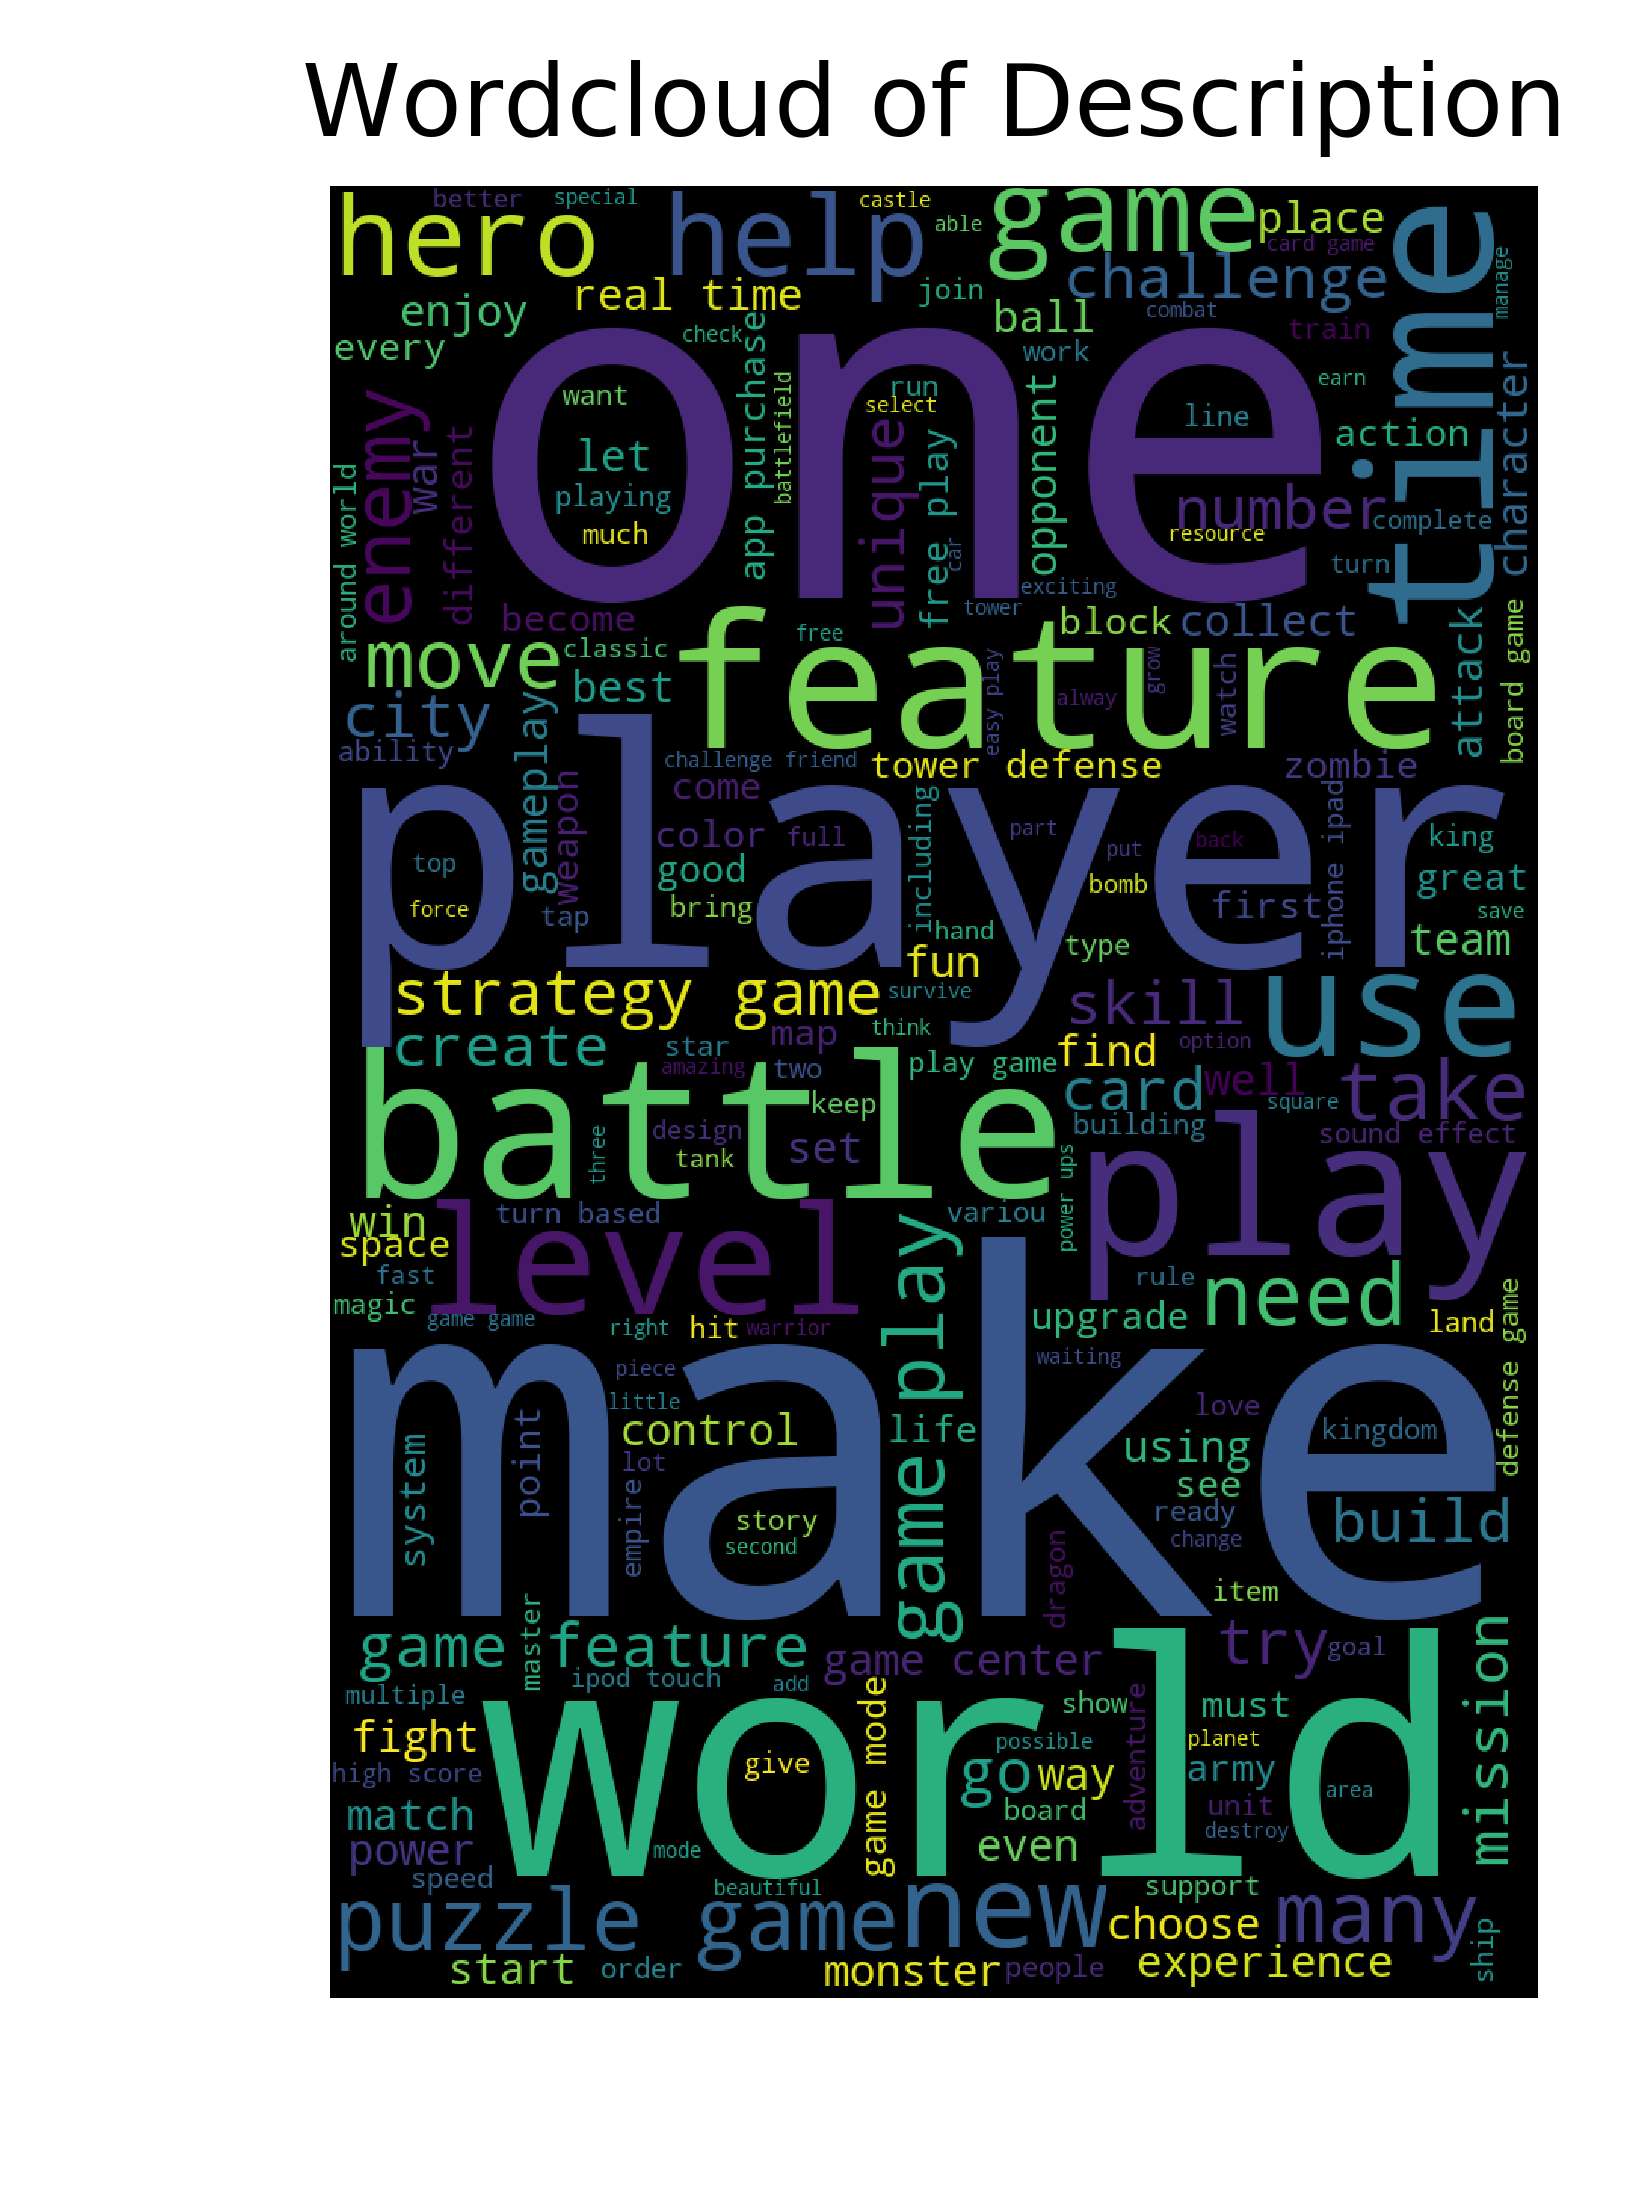

In [15]:
# Draw the wordcloud graph
plt.figure(dpi=300)
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Wordcloud of Description')
plt.show()
# plt.savefig('wordcloud.pgn')

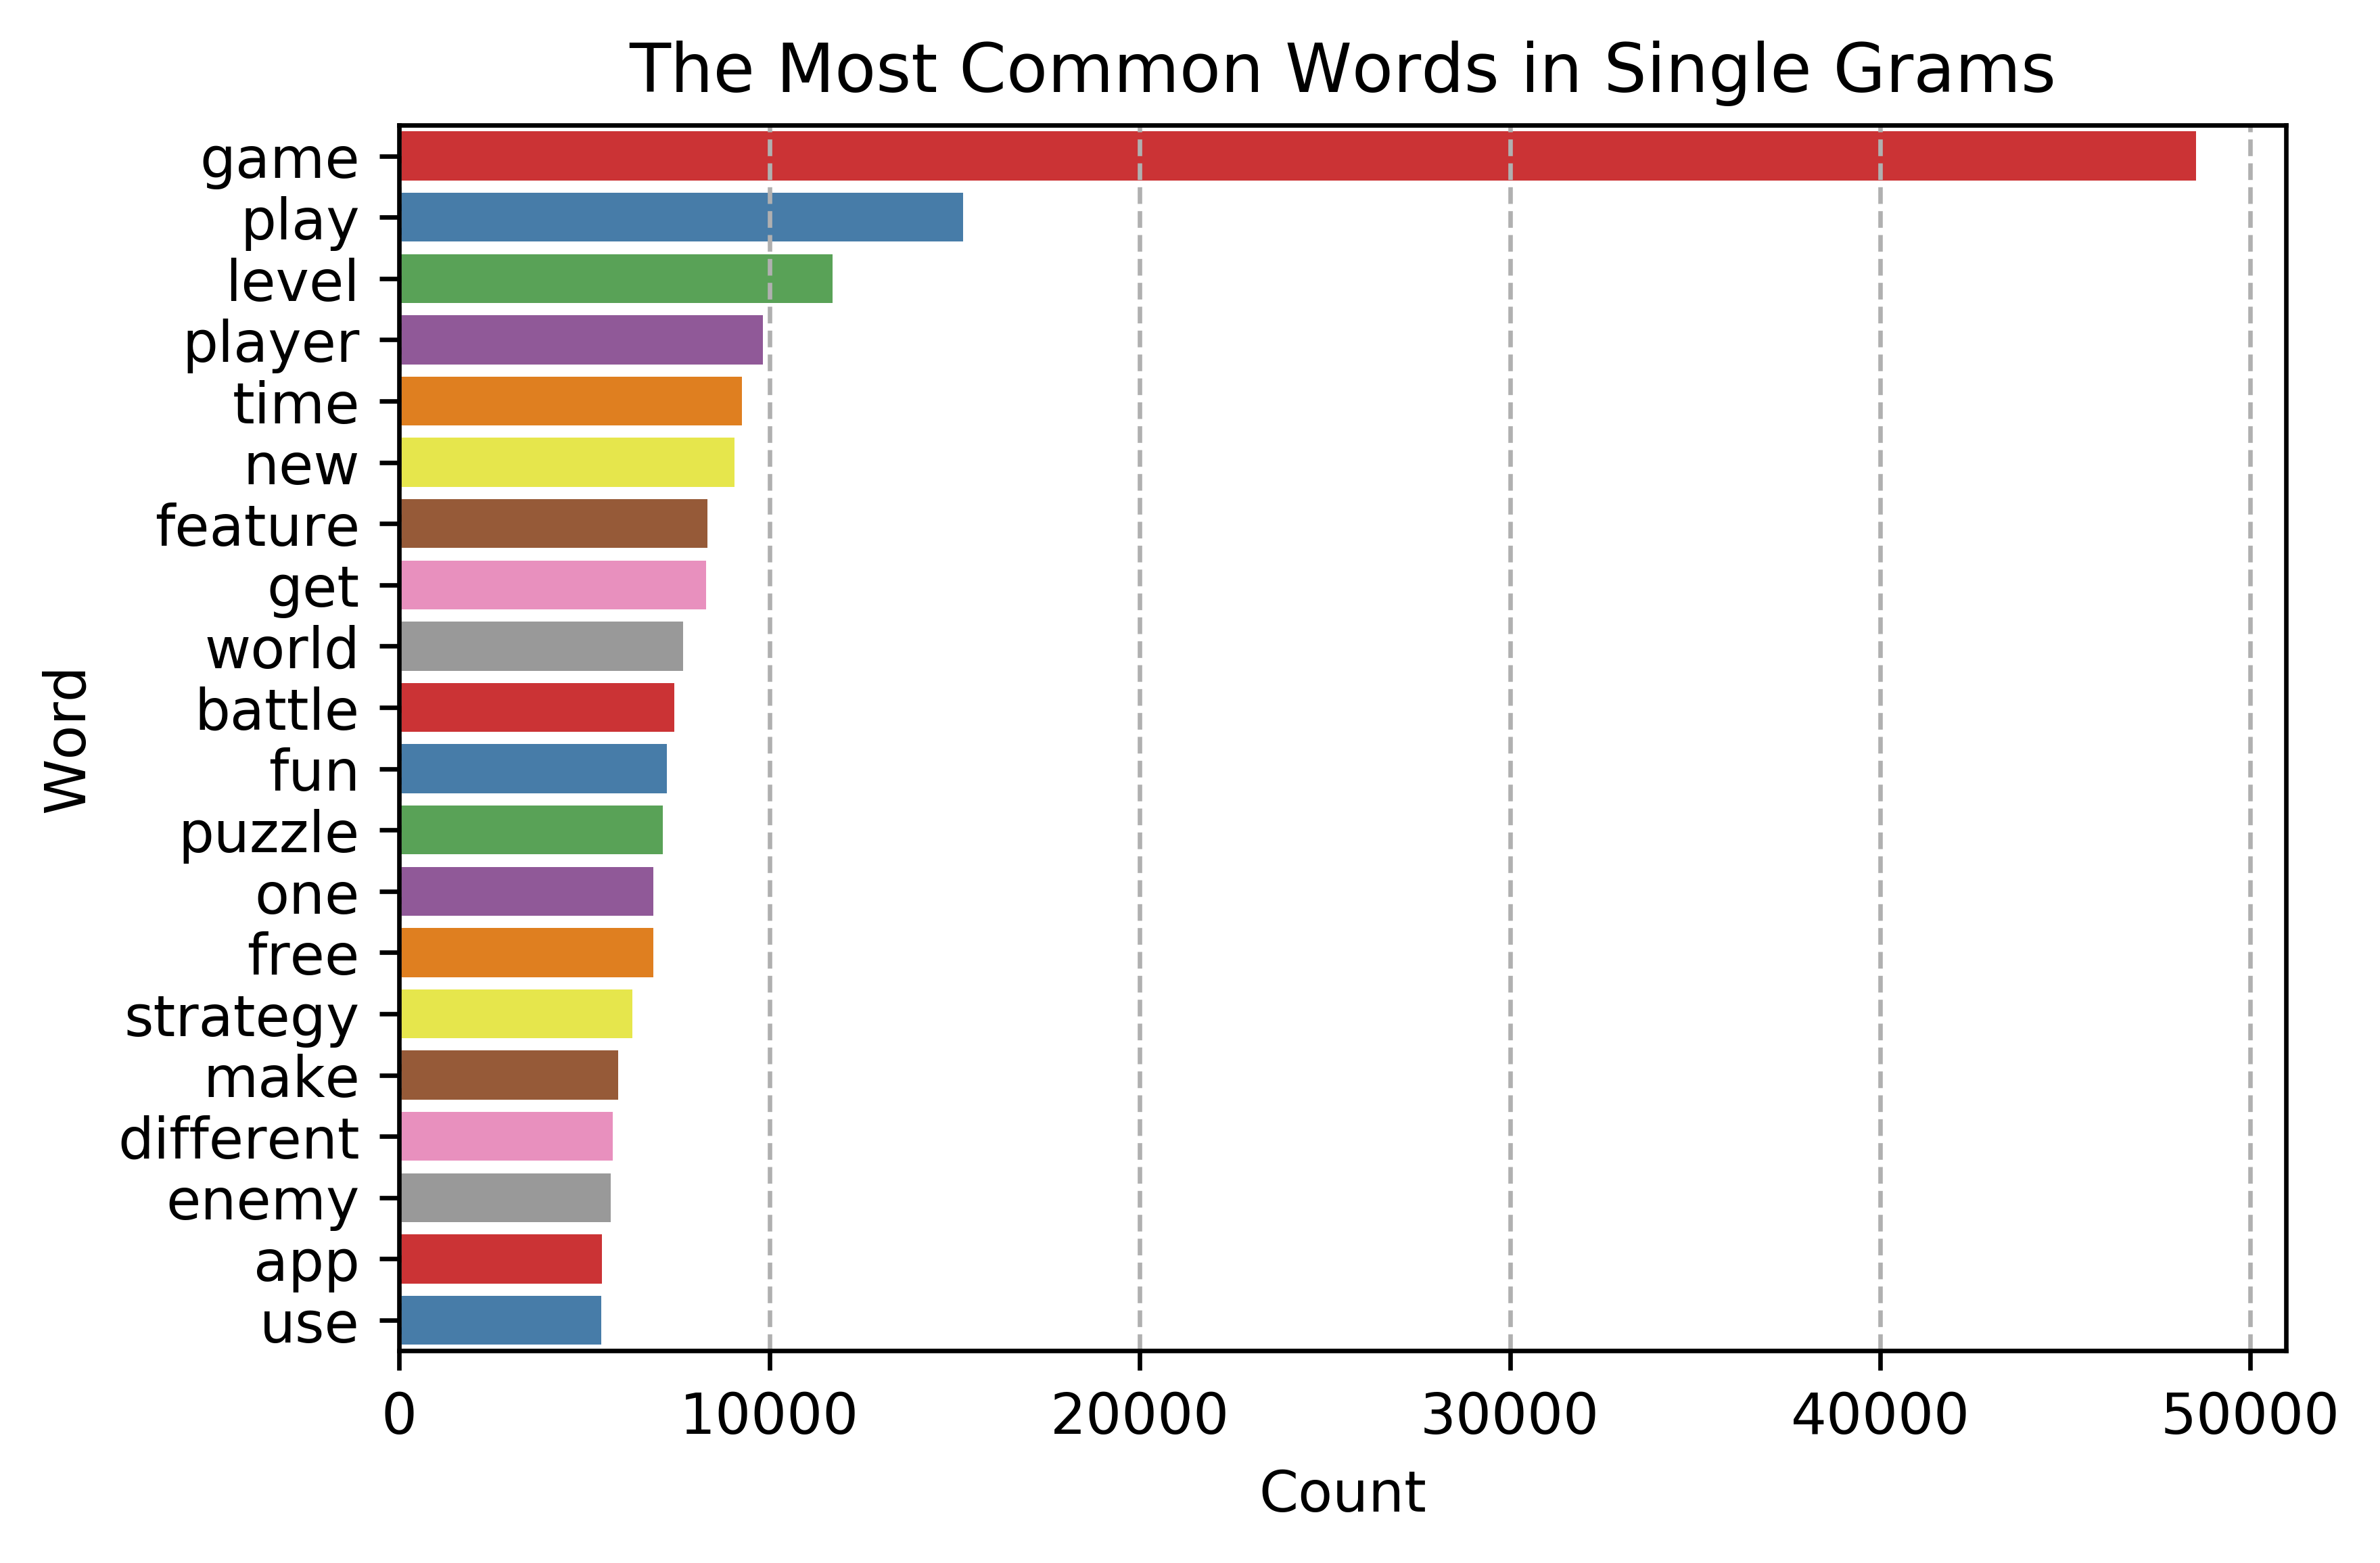

<Figure size 432x288 with 0 Axes>

In [16]:
plt.figure(dpi=300)
plt.grid(ls='--')
sns.barplot(x='Count', y='Word', data=freq_sig.sort_values('Count', ascending=False)[0:20], 
            palette="Set1")
plt.title('The Most Common Words in Single Grams')
plt.show()
plt.savefig('Singlegrams.png')

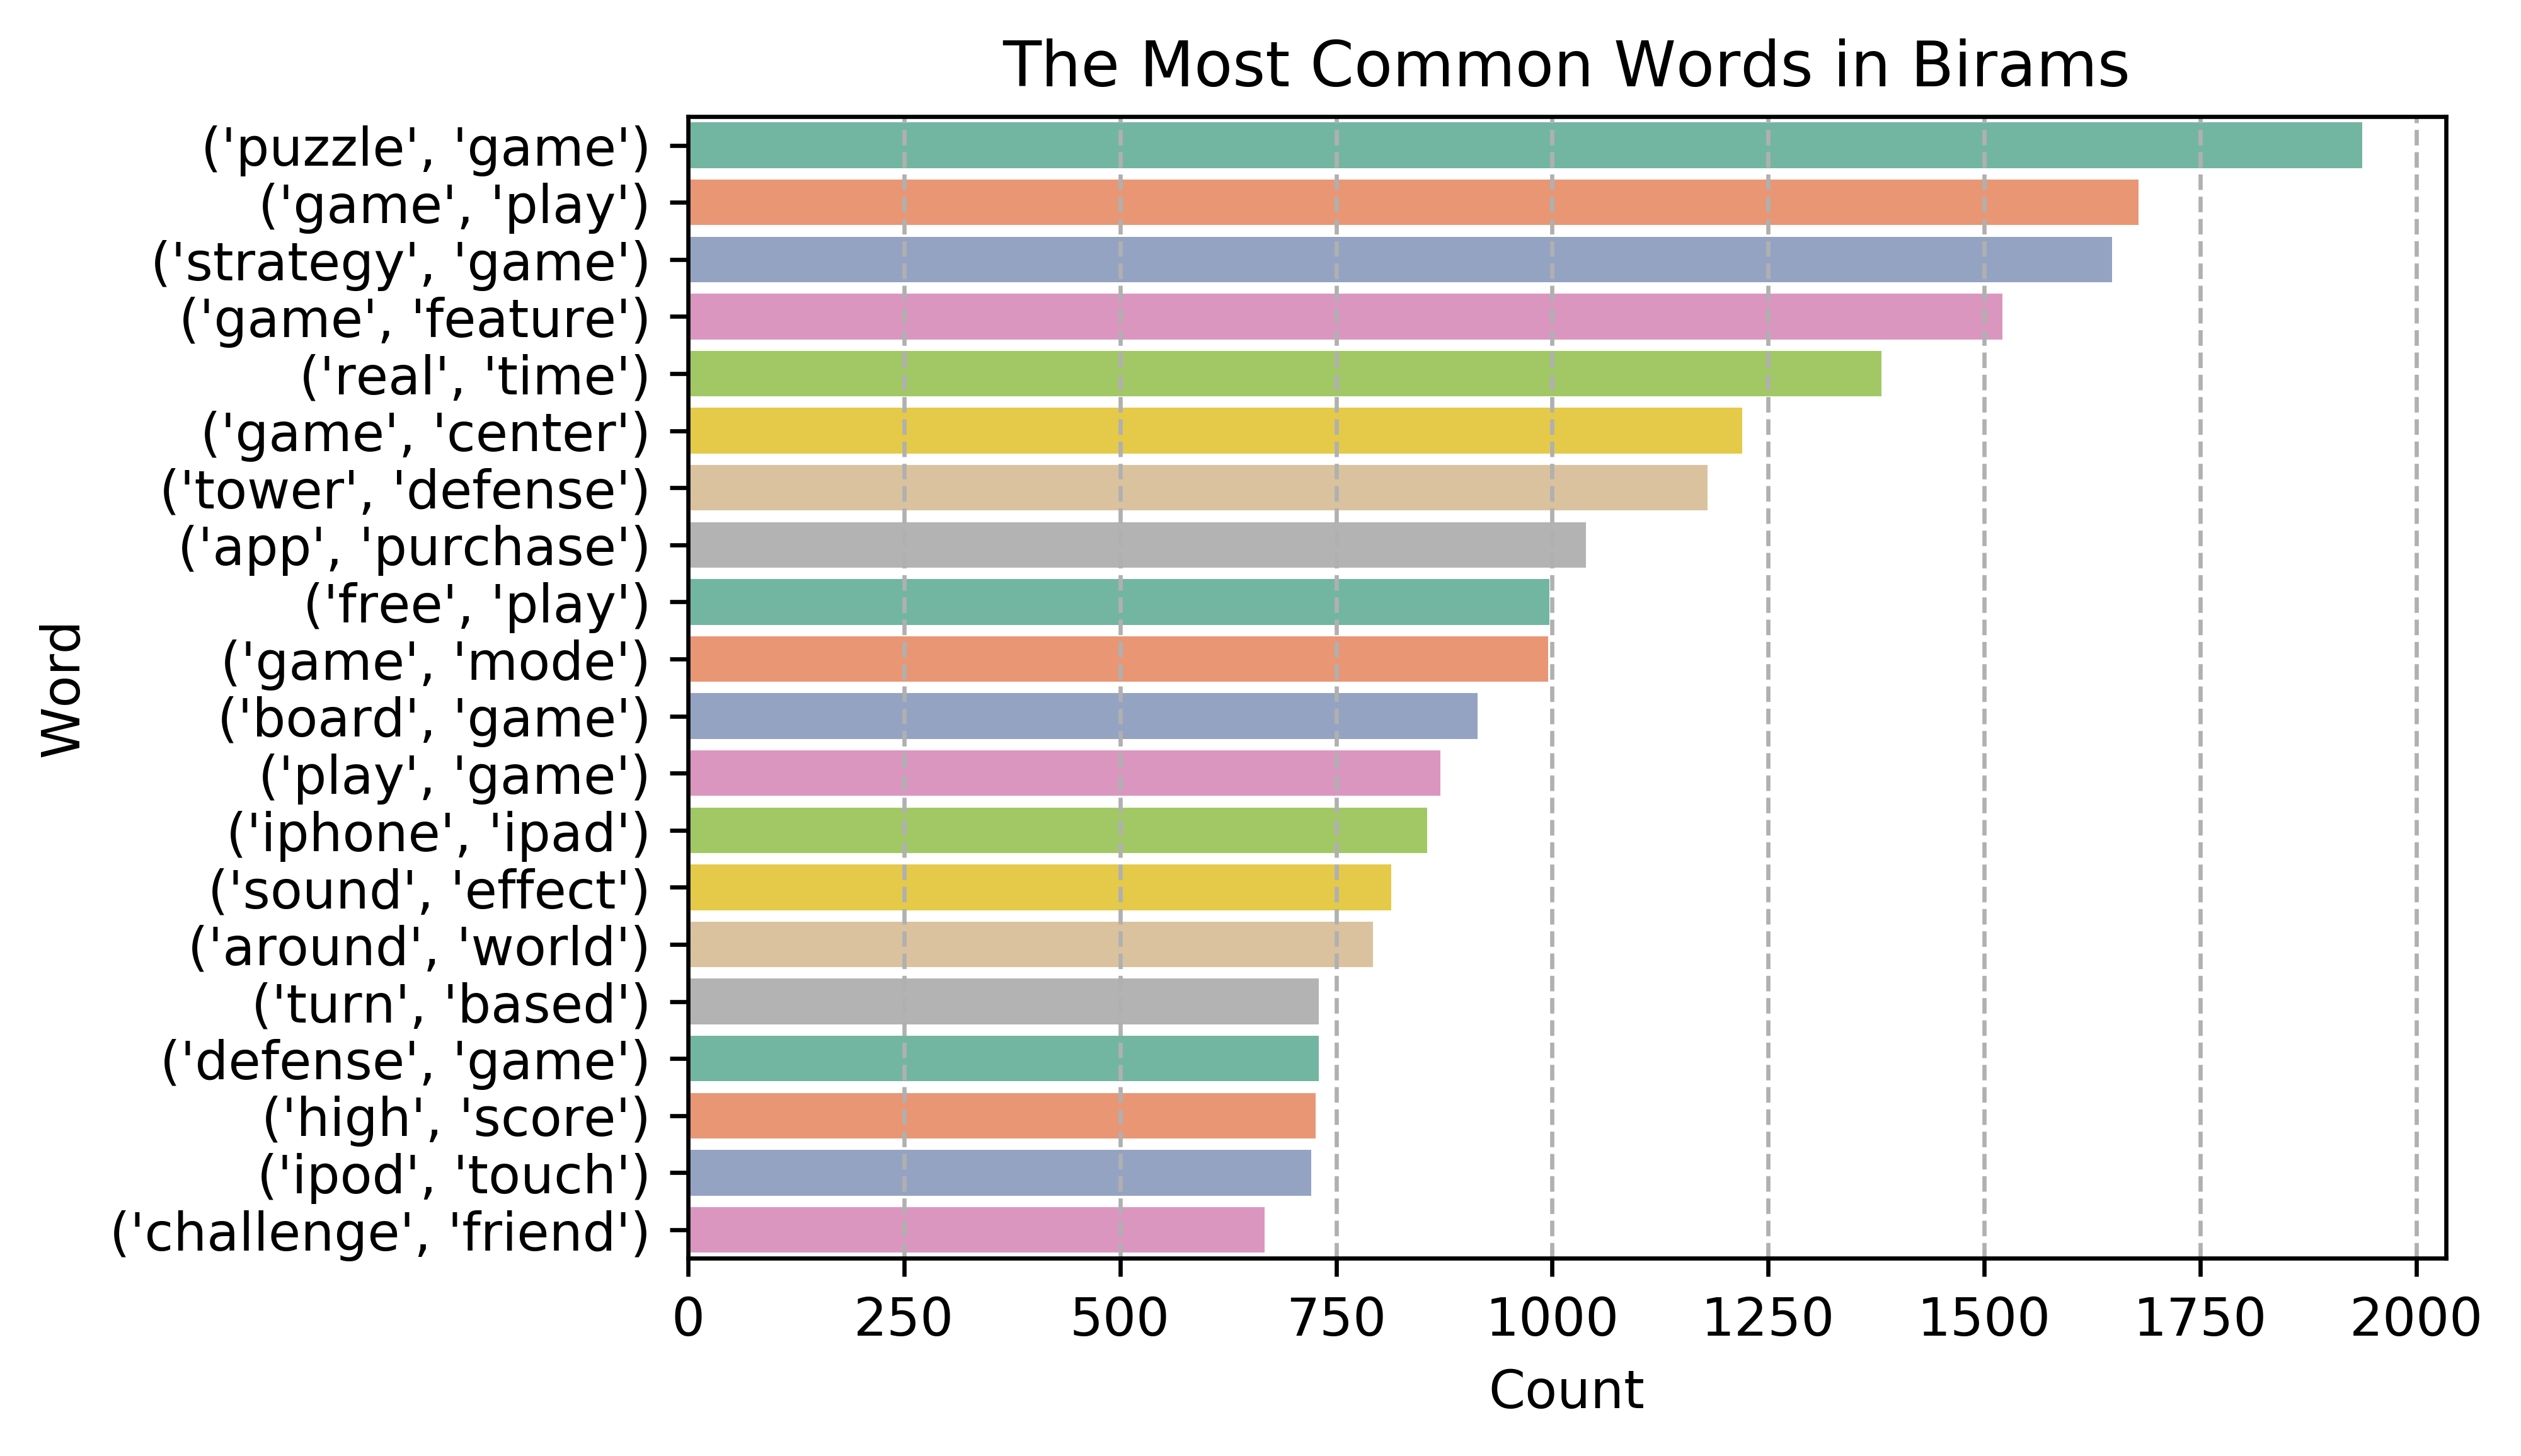

In [17]:
plt.figure(dpi=300)
plt.grid(ls='--')
sns.barplot(x='Count', y='Word', data=freq_bio.sort_values('Count', ascending=False)[0:20], palette="Set2")
plt.title('The Most Common Words in Birams')
plt.show()
# plt.savefig('Bigrams.png')

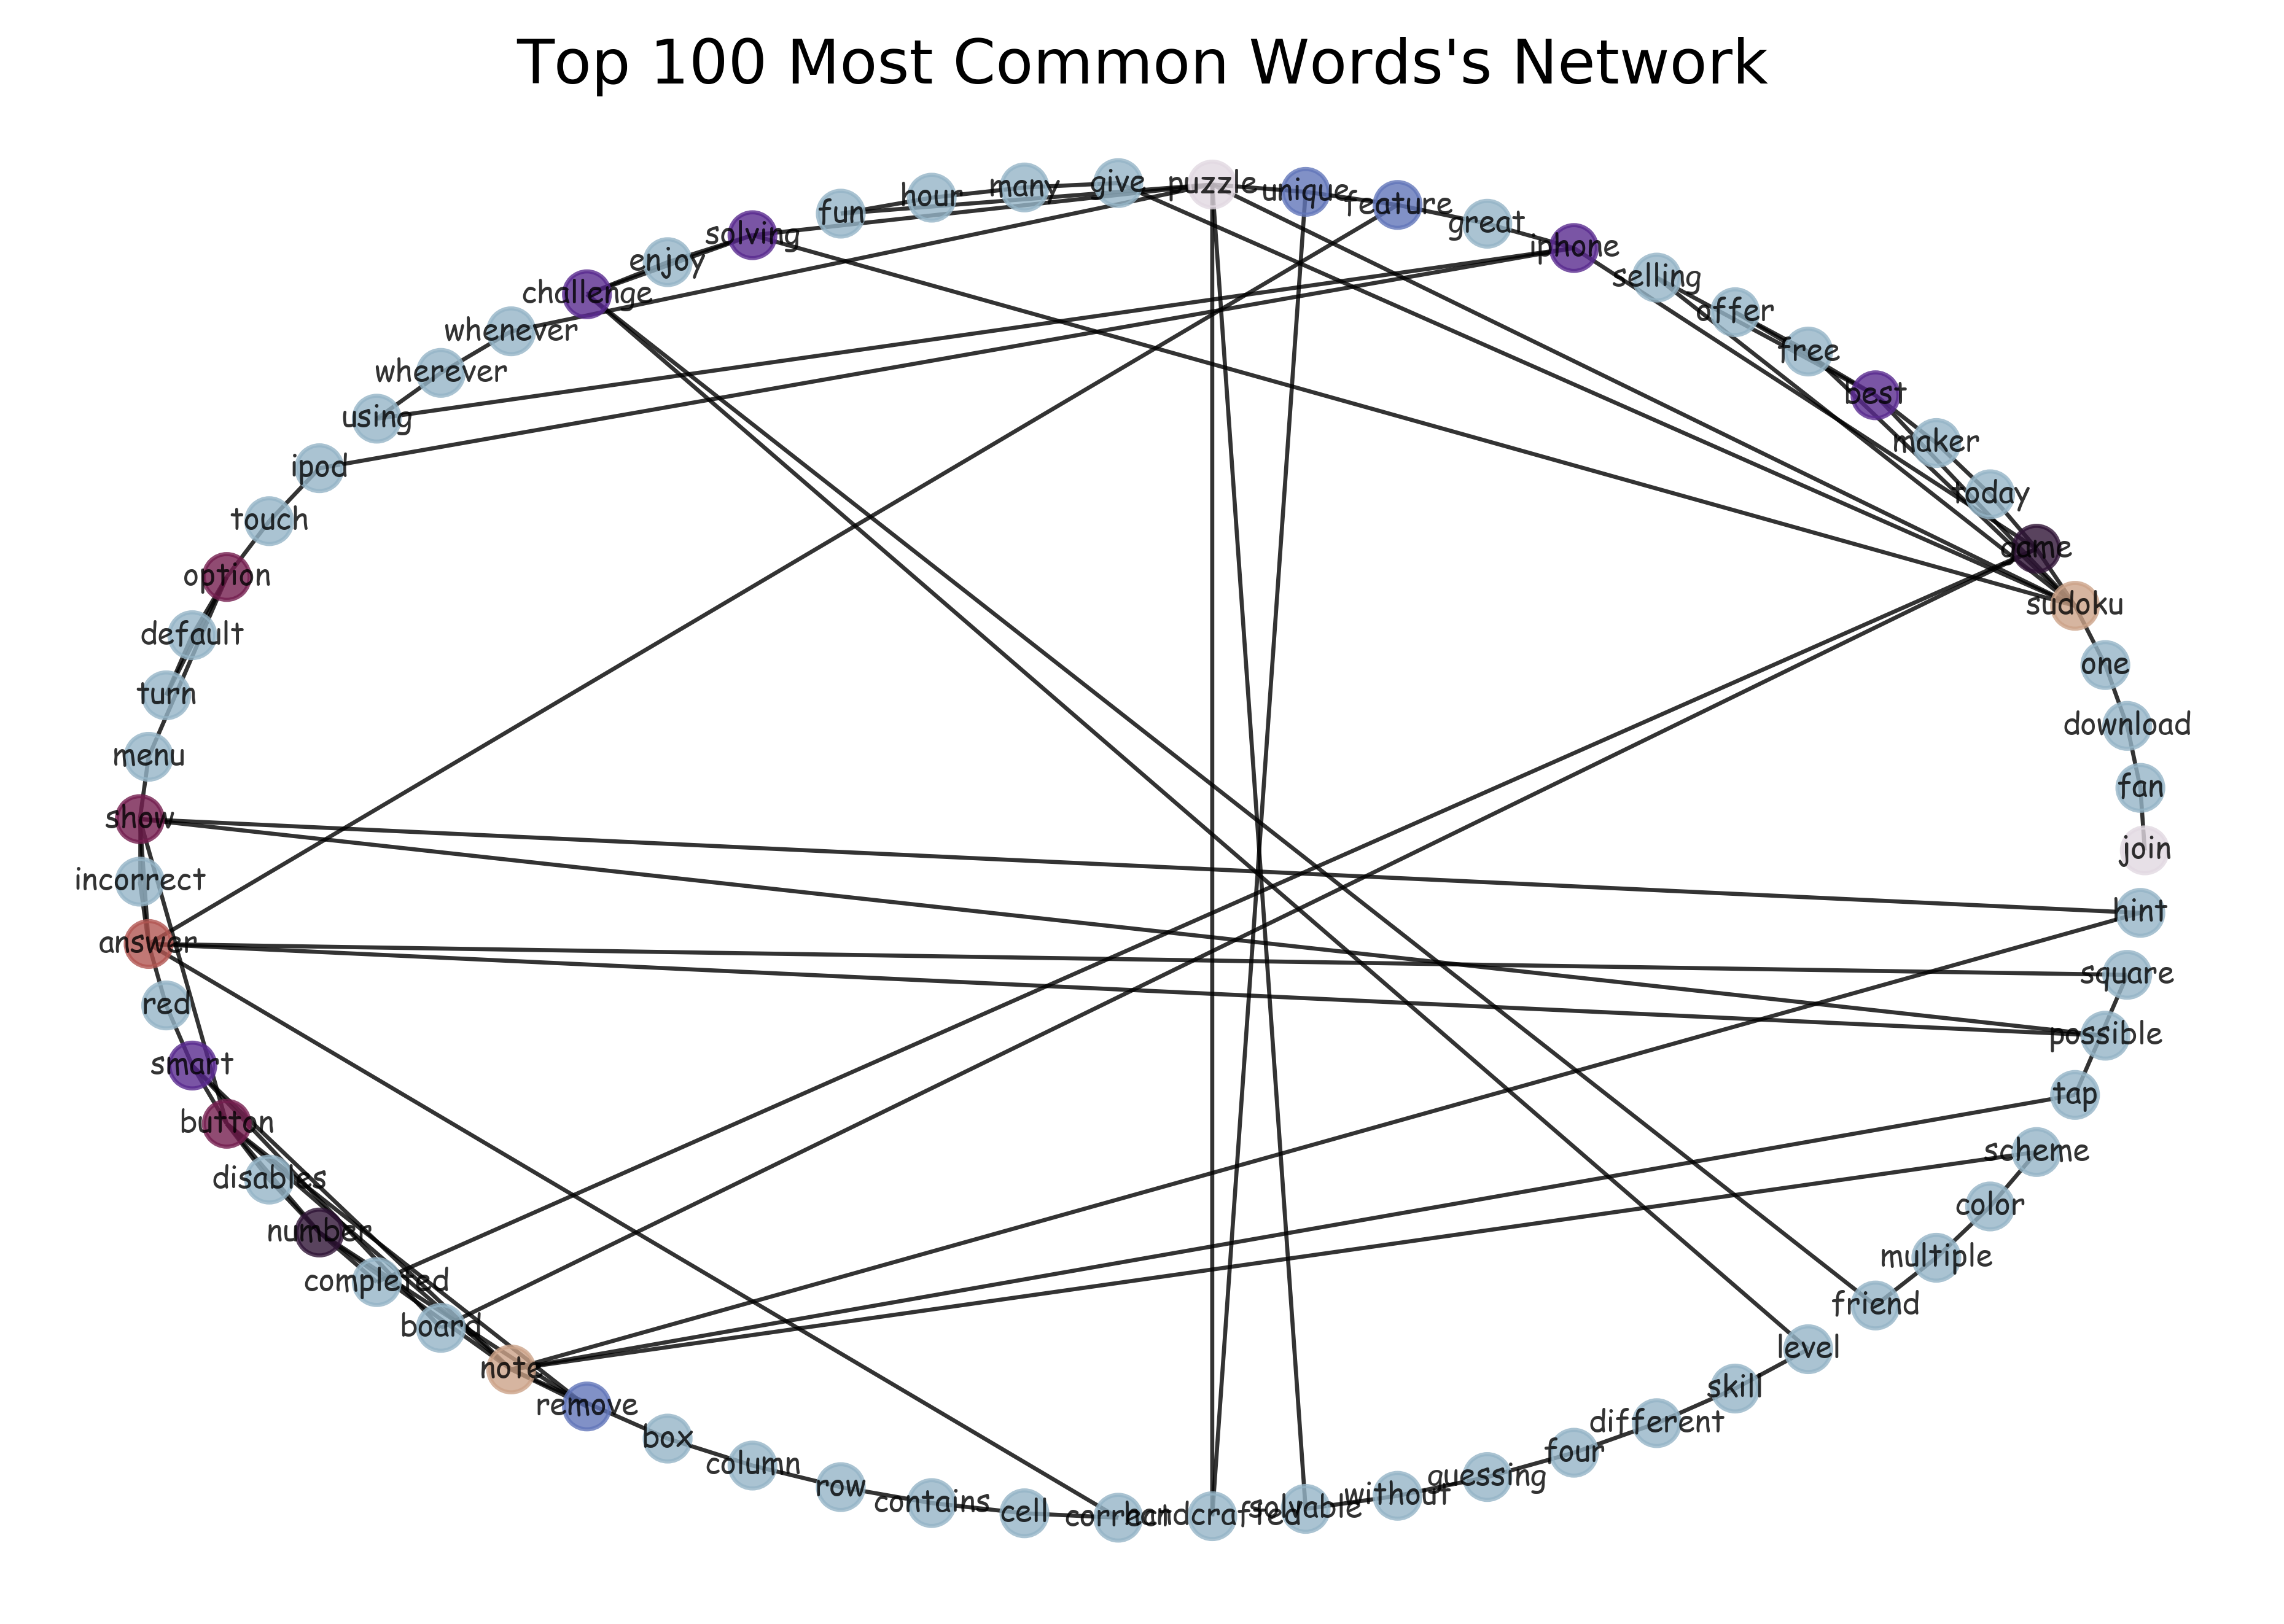

<Figure size 432x288 with 0 Axes>

In [20]:
import networkx as nx
num = 100
nw = []
for i in range(num):
    nw.append(freq_bio.sort_values('Count', ascending=False)['Word'][i])
G = nx.from_edgelist(nw)
colo = np.array(list(dict(G.degree()).values())) 
fig = plt.figure(dpi=300)
nx.draw_circular(G, with_labels=True, node_color=colo, cmap=plt.cm.twilight, node_size=80, line_color='grey',
        linewidths=0.8, width=0.8, font_size=6, alpha=0.8, font_family='fantasy')
plt.title("Top 100 Most Common Words's Network" )
plt.show()
plt.savefig('hundnet.png')

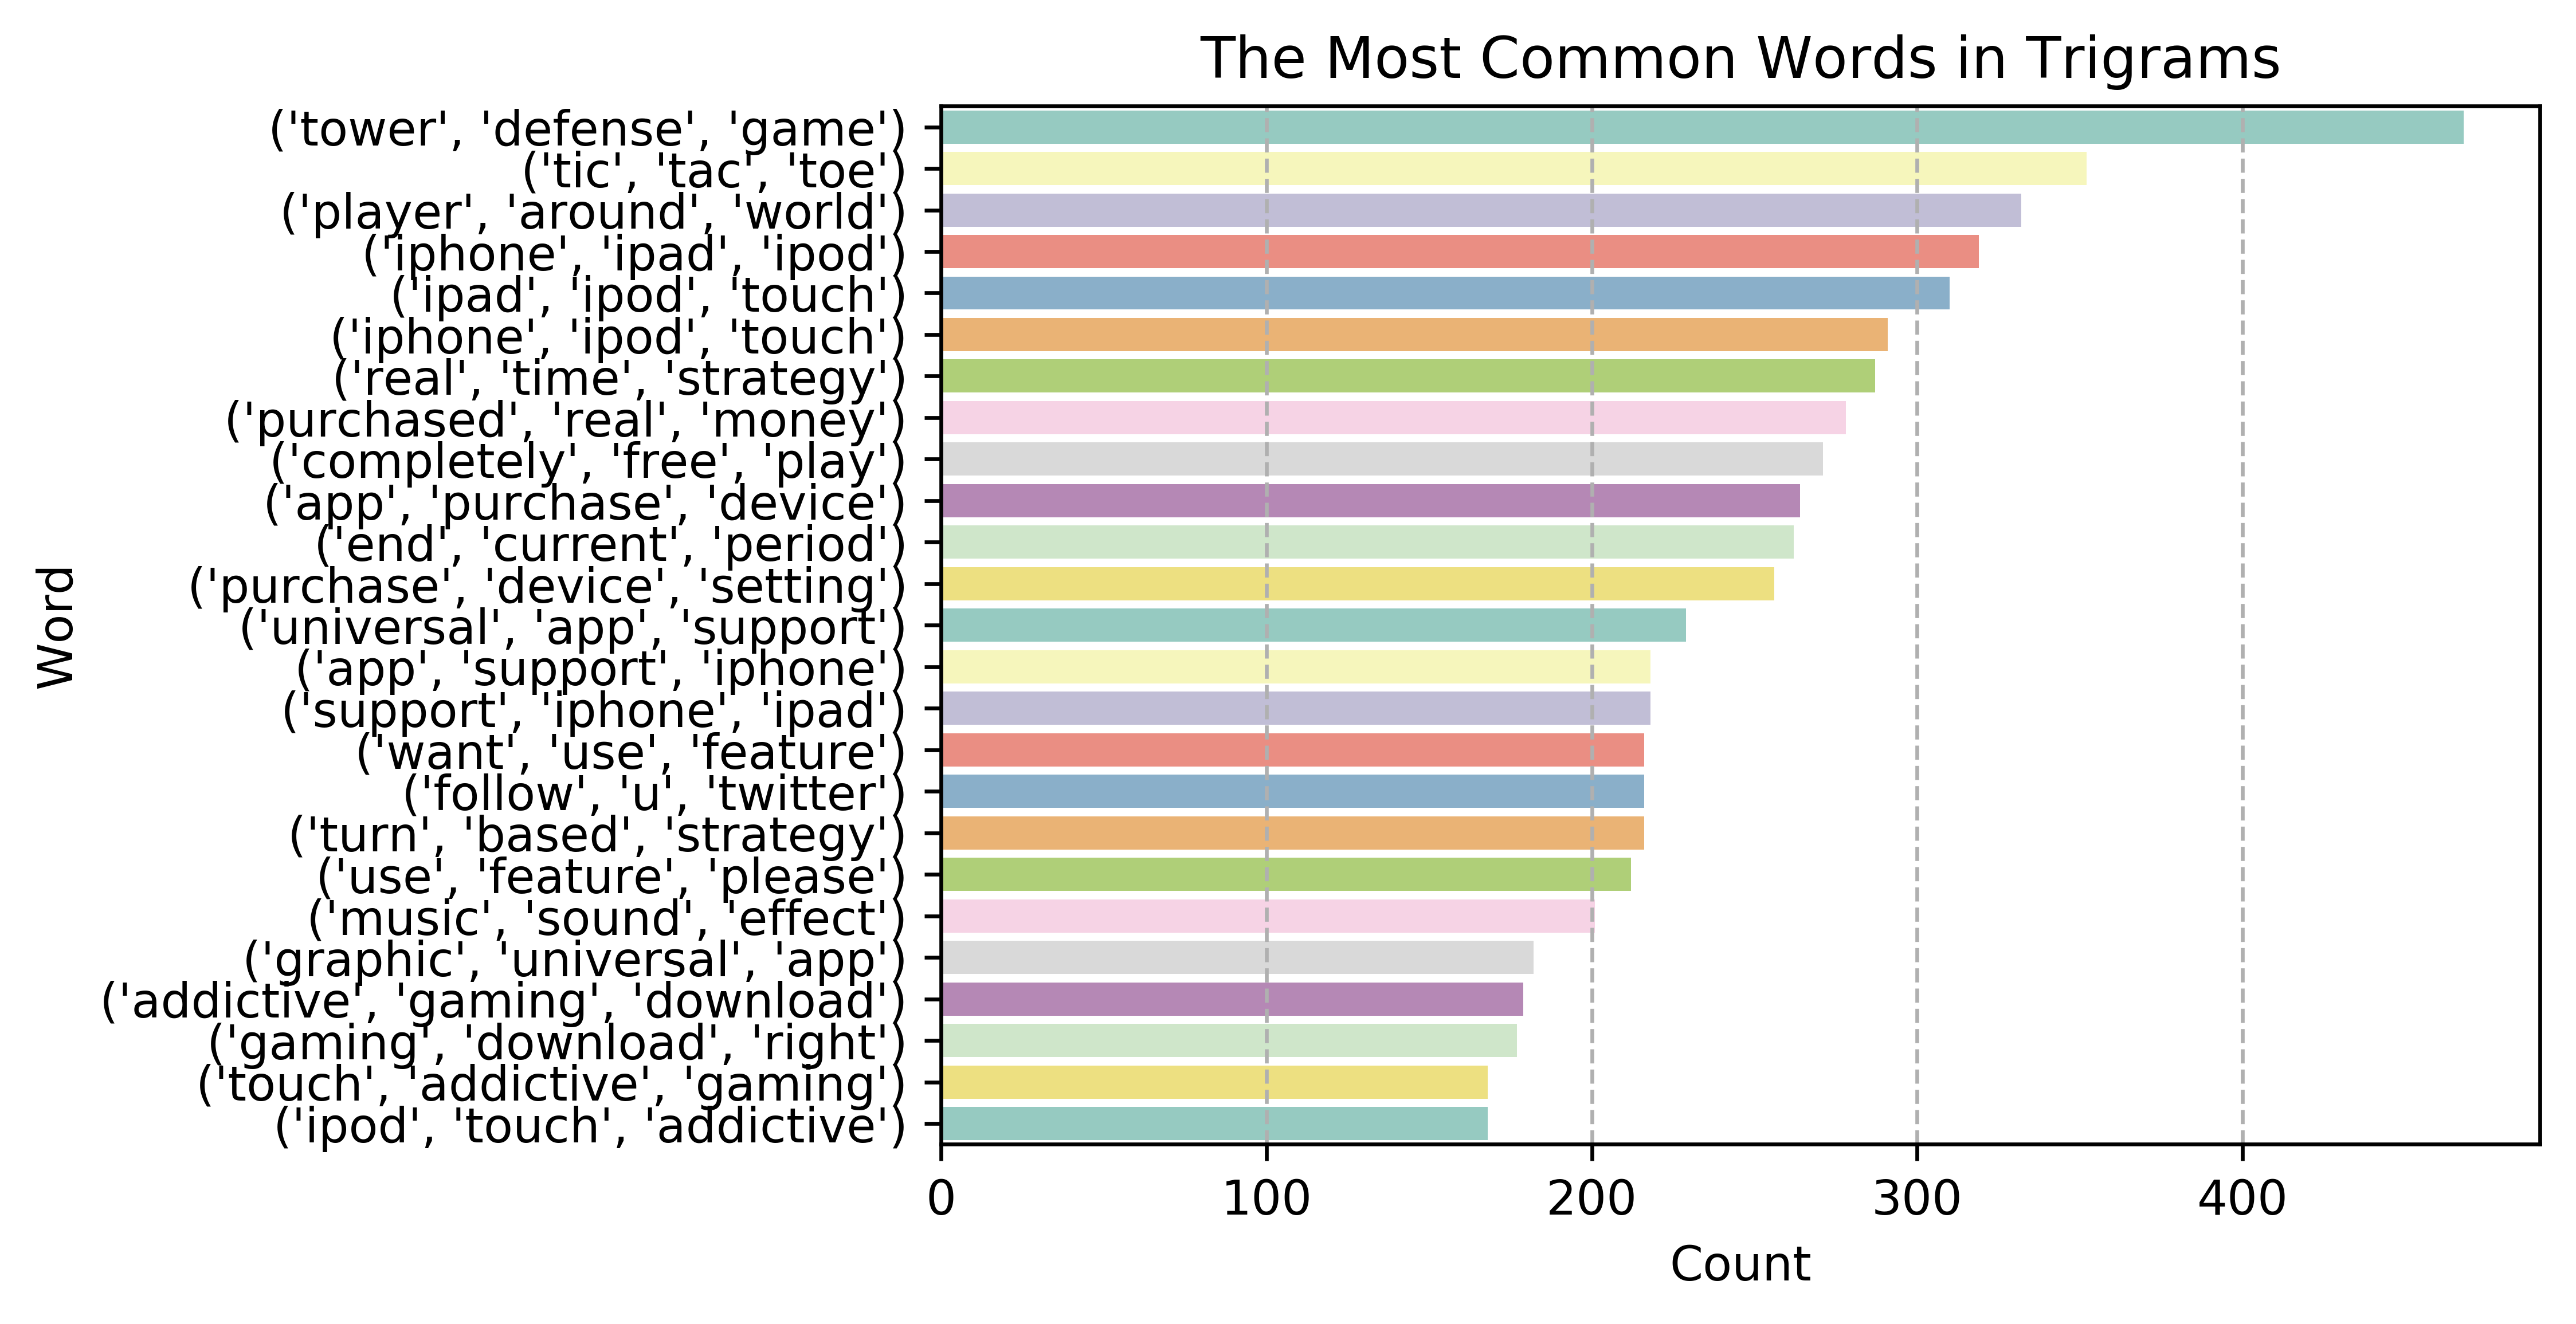

<Figure size 432x288 with 0 Axes>

In [22]:
plt.figure(dpi=300)
plt.grid(ls='--')
sns.barplot(x='Count', y='Word', data=freq_tri.sort_values('Count', ascending=False)[0:25], palette="Set3")
plt.title('The Most Common Words in Trigrams')
plt.show()
plt.savefig('Trigrams.png')

In [23]:
effective_words = []
for i, (k, v) in enumerate(token_dict.items()):
    if i in range(len(df)):  
        effective_words.append(len(v))
df['Effective Words'] = effective_words
display(df[['Name', 'Description', 'Effective Words']].head())

Name                                        Description  \
0         Sudoku  Join over 21,000,000 of our fans and download ...   
1        Reversi  The classic game of Reversi, also known as Oth...   
2        Morocco  Play the classic strategy game Othello (also k...   
3  Sudoku (Free)  Top 100 free app for over a year.\nRated "Best...   
4   Senet Deluxe  "Senet Deluxe - The Ancient Game of Life and A...   

   Effective Words  
0              148  
1              121  
2               54  
3              154  
4              188

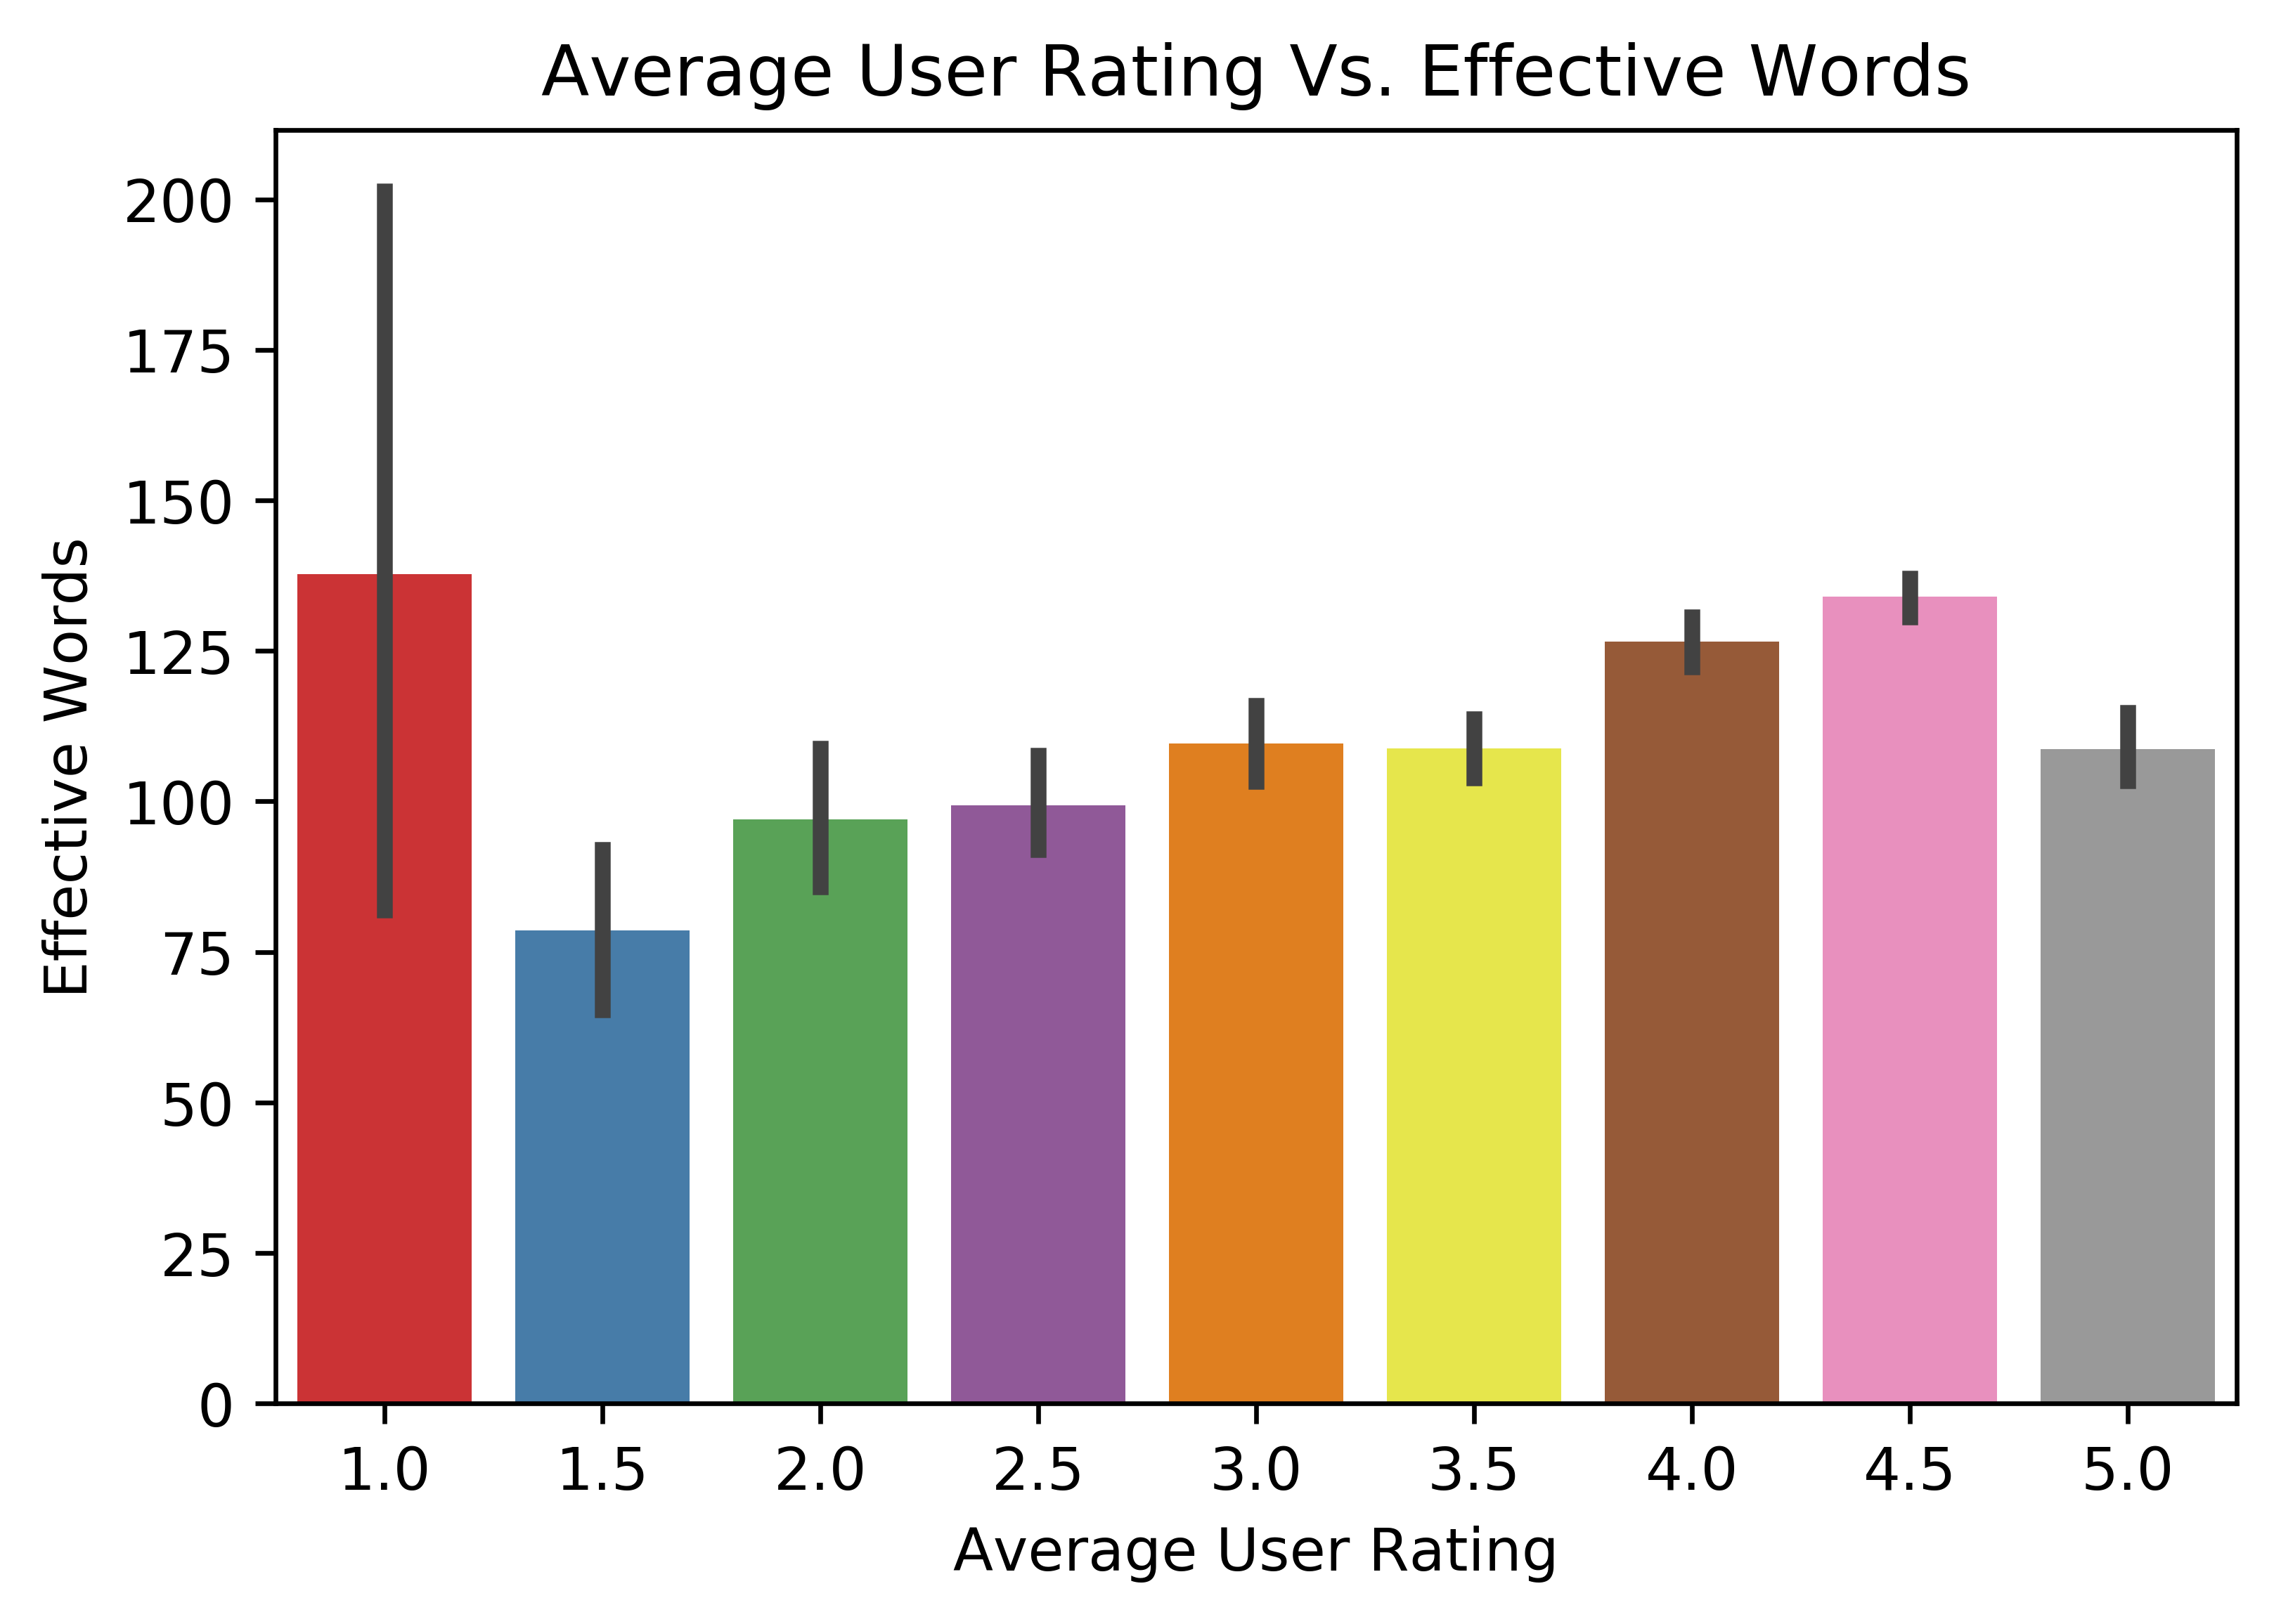

In [25]:
plt.figure(dpi=300)
sns.barplot(x='Average User Rating', y='Effective Words', data=df, palette="Set1")
plt.title('Average User Rating Vs. Effective Words')
plt.show()

In [26]:
def count_tags(tags):
    noun = 0
    adj = 0
    verb = 0
    adverb = 0
    for i in tags:
        if i[1] == 'JJ':
            adj += 1
        if i[1] == 'NN':
            noun += 1
        if i[1] == 'VB':
            verb += 1
        if i[1] == 'RB':
            adverb += 1
    return [noun, adj, verb, adverb]

In [27]:
num_noun = []
num_adj = []
num_verb = []
num_adverb = []
for i in df['Name']:   
    tags = count_tags(nltk.pos_tag(token_dict[i]))
    num_noun.append(tags[0])
    num_adj.append(tags[1])
    num_verb.append(tags[2])
    num_adverb.append(tags[3])

In [30]:
df['The Proportion of N.'] = num_noun / df['Effective Words']
df['The Proportion of Adj.'] = num_adj / df['Effective Words']
df['The Proportion of V.'] = num_verb / df['Effective Words']
df['The Proportion of Adv.'] = num_adverb / df['Effective Words']

In [31]:
display(df[['Name', 'Effective Words', 'The Proportion of N.', 'The Proportion of Adj.', 'The Proportion of V.', 'The Proportion of Adv.']].head())

Name  Effective Words  The Proportion of N.  \
0         Sudoku              148              0.554054   
1        Reversi              121              0.495868   
2        Morocco               54              0.481481   
3  Sudoku (Free)              154              0.564935   
4   Senet Deluxe              188              0.515957   

   The Proportion of Adj.  The Proportion of V.  The Proportion of Adv.  
0                0.182432              0.027027                0.006757  
1                0.173554              0.033058                0.057851  
2                0.203704              0.018519                0.055556  
3                0.168831              0.019481                0.012987  
4                0.207447              0.026596                0.031915

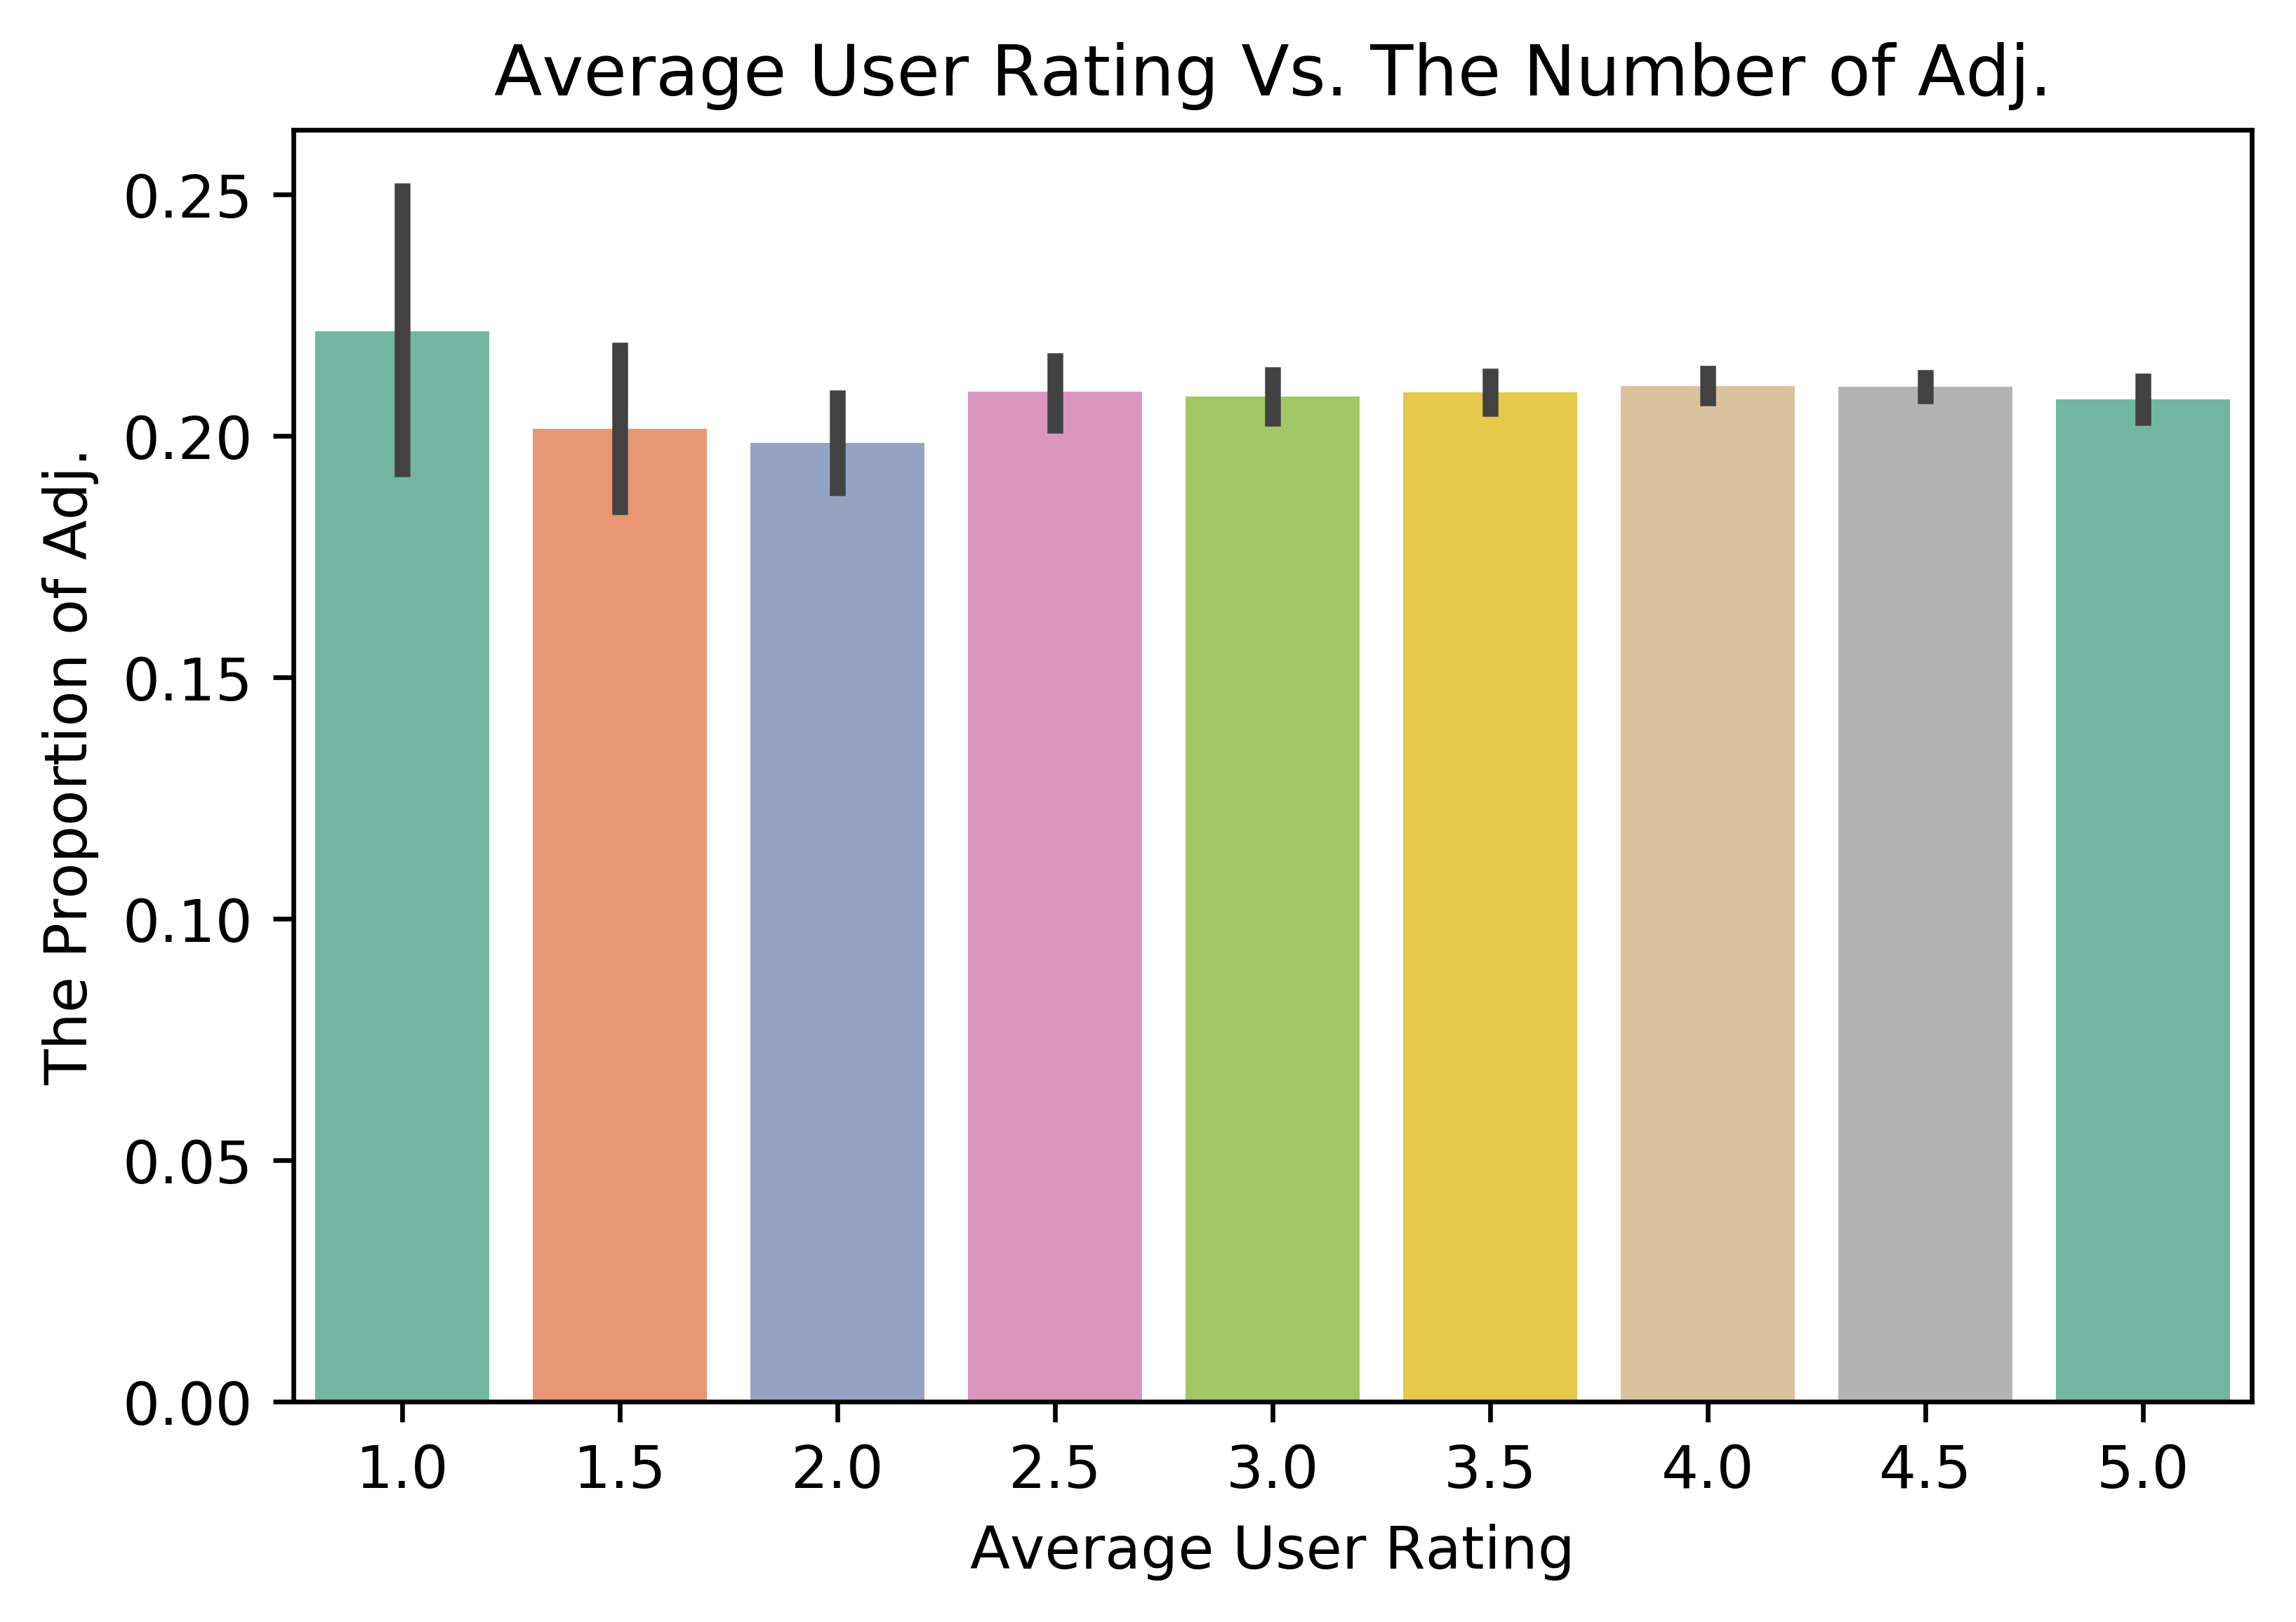

In [32]:
plt.figure(dpi=300)
sns.barplot(x='Average User Rating', y='The Proportion of Adj.', data=df, palette="Set2")
plt.title('Average User Rating Vs. The Number of Adj.')
plt.show()

# Analysis of App Titles

In [33]:
title_token_dict = {}
for i in range(len(df)):
    title_token_dict[df['Name'][i]] = tk(df['Name'][i])

In [34]:
title_entire_description = []
for i in title_token_dict.values():
    title_entire_description += i

title_bio_tokens = bigrams(title_entire_description)
temp = []
for i in title_bio_tokens:
    temp.append(i)
title_bio_tokens = temp
title_freq_bio = FreqDist(title_bio_tokens)

In [35]:
title_freq_sig = FreqDist(title_entire_description)
title_freq_sig = pd.DataFrame({'Word': list(dict(title_freq_sig).keys()),
                       'Count': list(dict(title_freq_sig).values())})

title_freq_bio = FreqDist(title_bio_tokens)
title_freq_bio = pd.DataFrame({'Word': list(dict(title_freq_bio).keys()),
                       'Count': list(dict(title_freq_bio).values())})

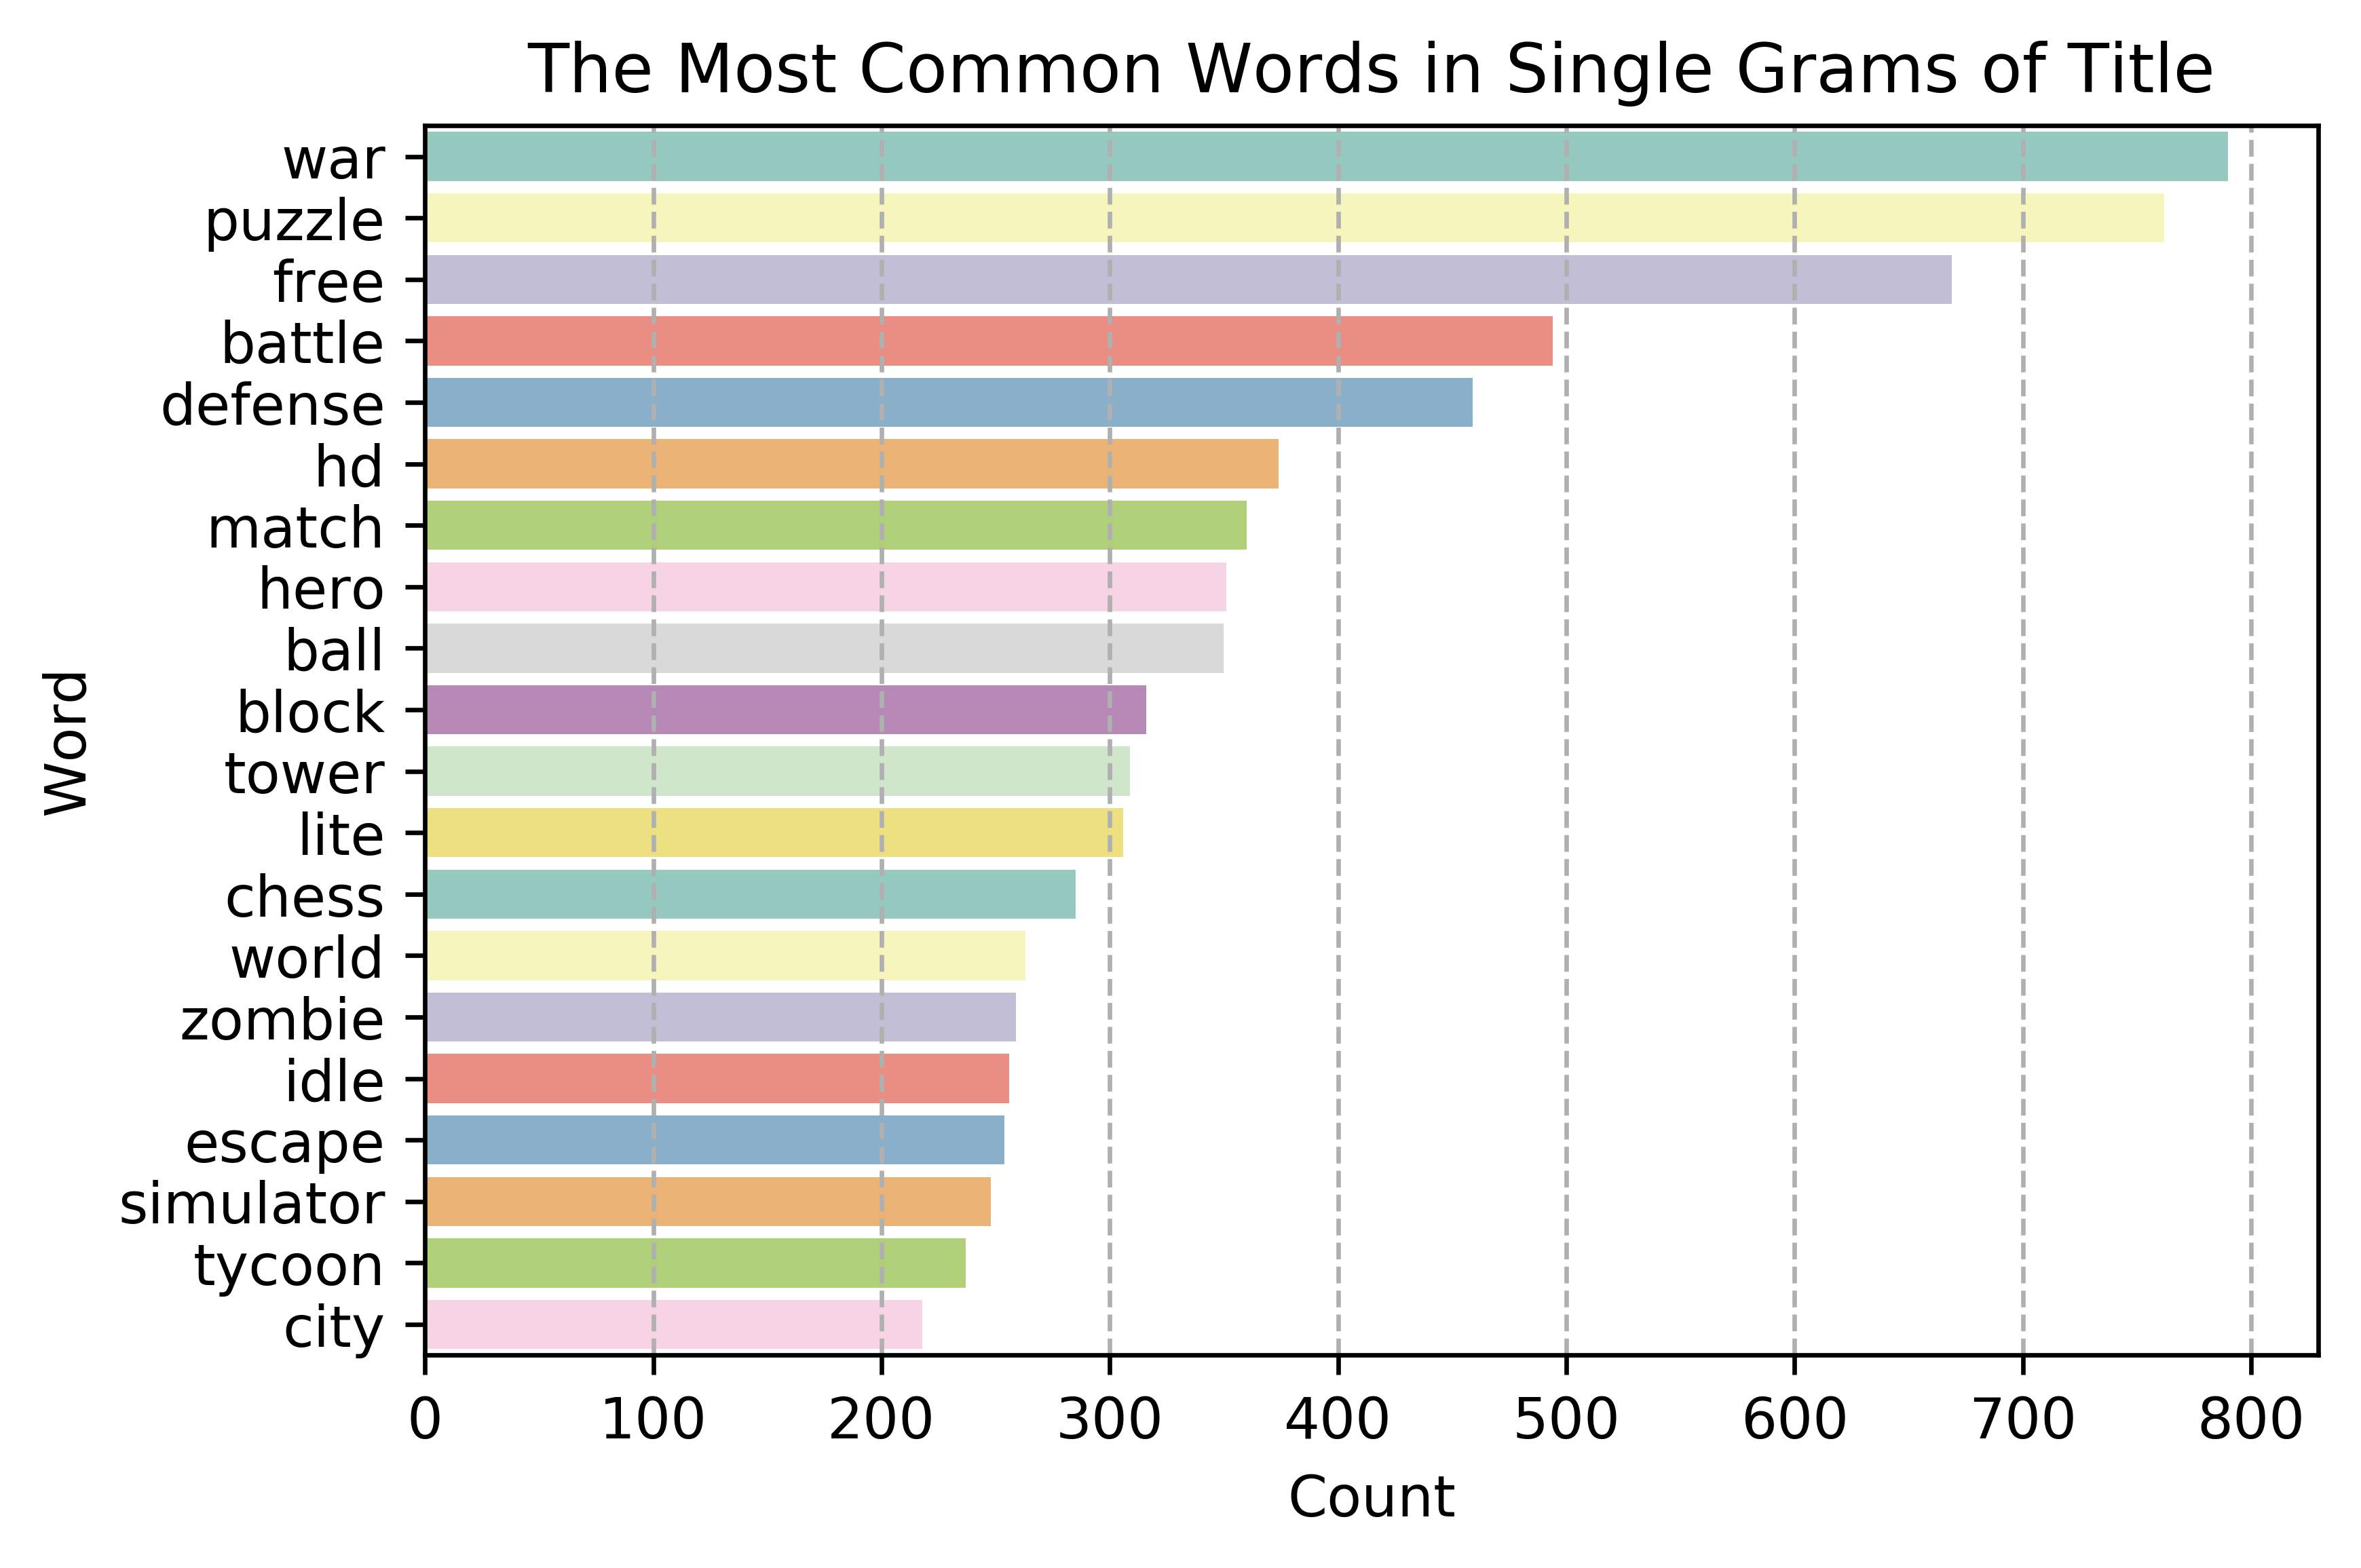

In [36]:
plt.figure(dpi=300)
plt.grid(ls='--')
sns.barplot(x='Count', y='Word', data=title_freq_sig.sort_values('Count', ascending=False)[1:21], palette="Set3")
plt.title('The Most Common Words in Single Grams of Title')
plt.show()

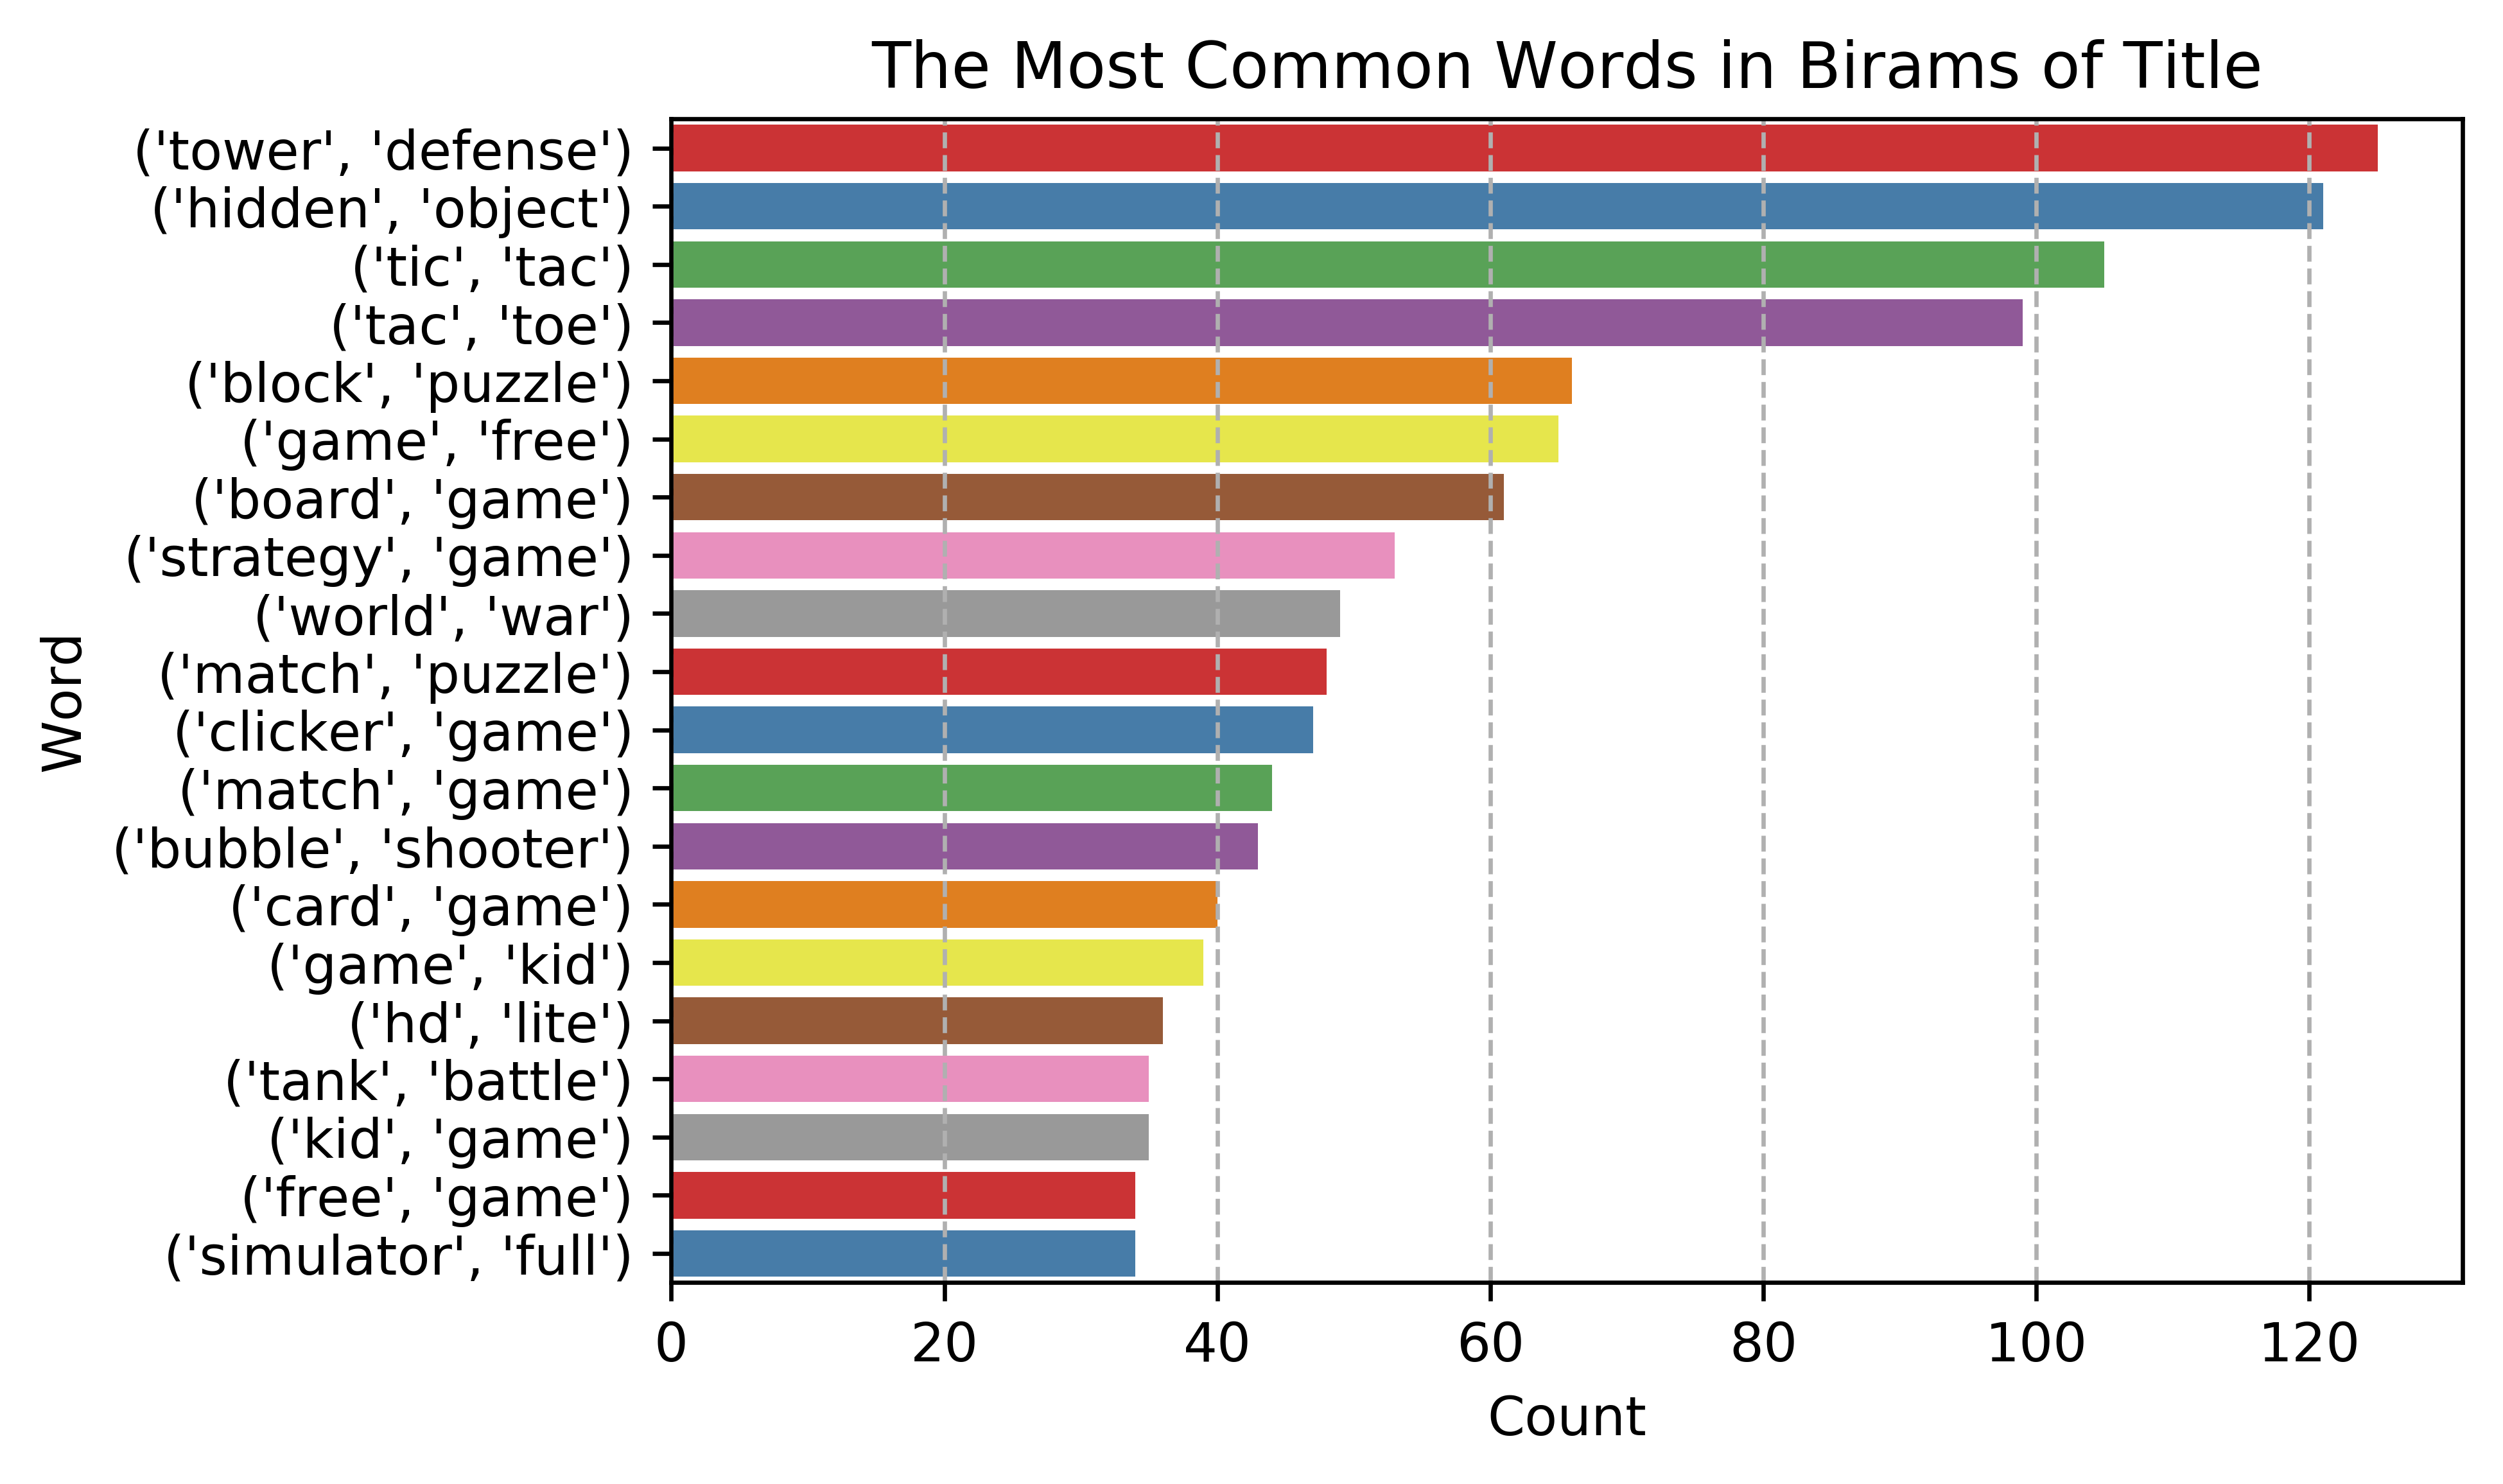

In [37]:
plt.figure(dpi=300)
plt.grid(ls='--')
sns.barplot(x='Count', y='Word', data=title_freq_bio.sort_values('Count', ascending=False)[1:21], palette="Set1")
plt.title('The Most Common Words in Birams of Title')
plt.show()